In [1]:
mc.cores = parallel::detectCores()
#rstan_options(auto_write = TRUE)

# load data and copy
library(rethinking)
data(WaffleDivorce)
d <- WaffleDivorce
# standardize variables
d$A <- scale( d$MedianAgeMarriage )
d$D <- scale( d$Divorce )

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 1.88)


In [2]:
sd( d$MedianAgeMarriage )

[1] 1.24363

In [3]:
m5.1 <- quap(
            alist(
                D ~ dnorm( mu , sigma ) ,
                mu <- a + bA * A ,
                a ~ dnorm( 0 , 0.2 ) ,
                bA ~ dnorm( 0 , 0.5 ) ,
                sigma ~ dexp( 1 )
                ) , data = d )

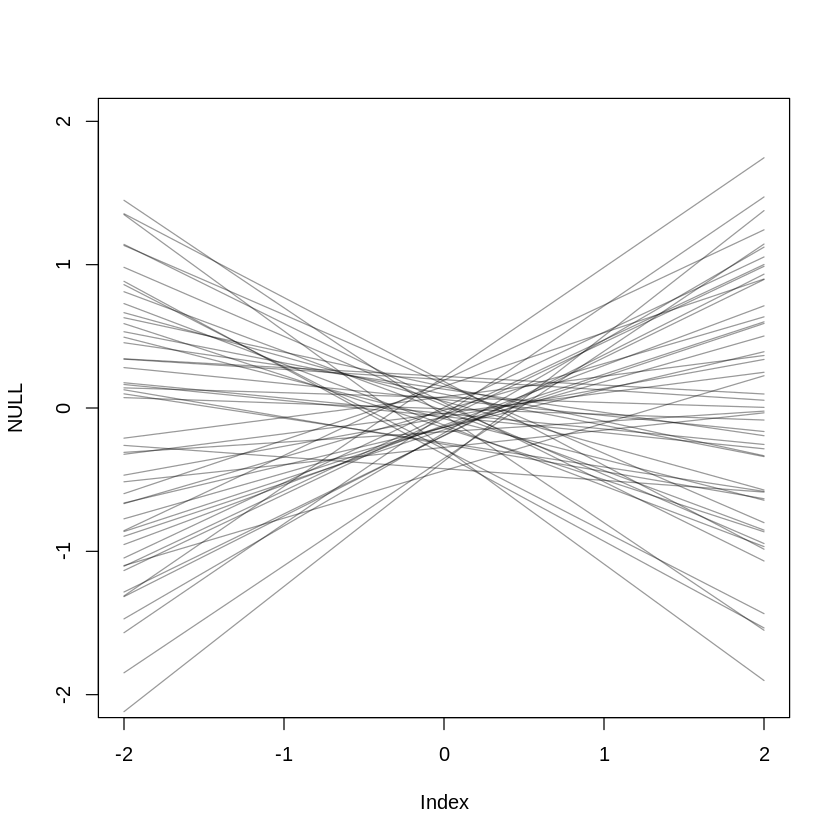

In [4]:
set.seed(10)
prior <- extract.prior( m5.1 )
mu <- link( m5.1 , post=prior , data=list( A=c(-2,2) ) )
plot( NULL , xlim=c(-2,2) , ylim=c(-2,2) )
for ( i in 1:50 ) lines( c(-2,2) , mu[i,] , col=col.alpha("black",0.4) )

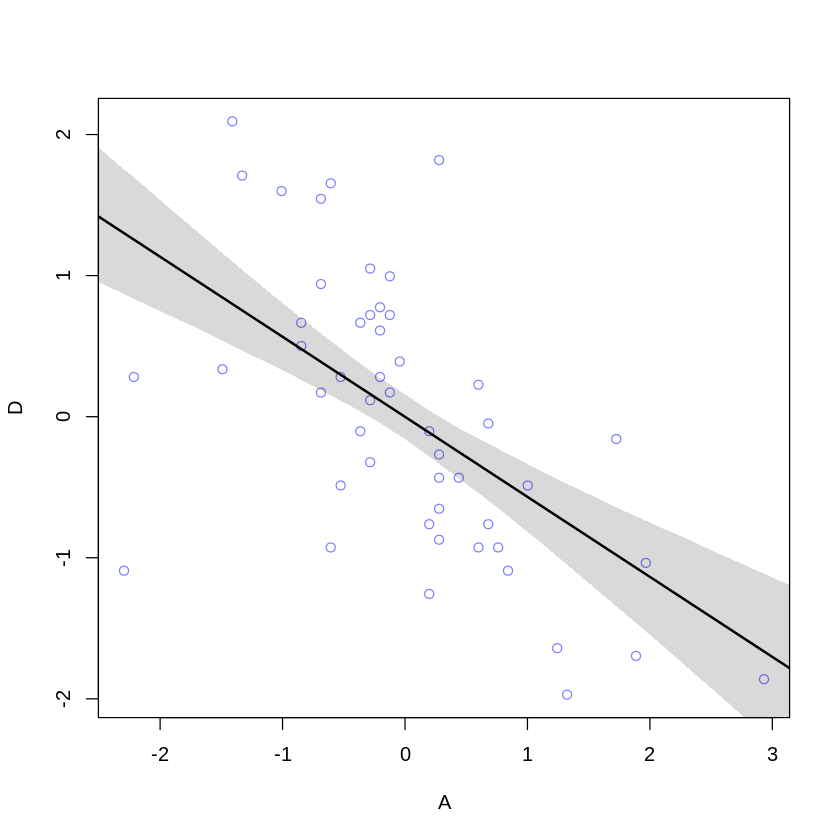

In [5]:
# compute percentile interval of mean
A_seq <- seq( from=-3 , to=3.2 , length.out=30 )
mu <- link( m5.1 , data=list(A=A_seq) )
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )

# plot it all
plot( D ~ A , data=d , col=rangi2 )
lines( A_seq , mu.mean , lwd=2 )
shade( mu.PI , A_seq )

In [6]:
precis(m5.1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-4.028649e-06,0.09737610,-0.1556298,0.1556218
bA,-5.684141e-01,0.10999594,-0.7442088,-0.3926193
sigma,7.882974e-01,0.07800435,0.6636314,0.9129634


In [7]:
d$M <- scale( d$Marriage )

m5.2 <- quap(
            alist(
            D ~ dnorm( mu , sigma ) ,
            mu <- a + bM * M ,
            a ~ dnorm( 0 , 0.2 ) ,
            bM ~ dnorm( 0 , 0.5 ) ,
            sigma ~ dexp( 1 )
            ) , data = d )

precis(m5.2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,2.918047e-07,0.10824642,-0.1729984,0.1729990
bM,3.500540e-01,0.12592744,0.1487977,0.5513104
sigma,9.102653e-01,0.08986239,0.7666479,1.0538828


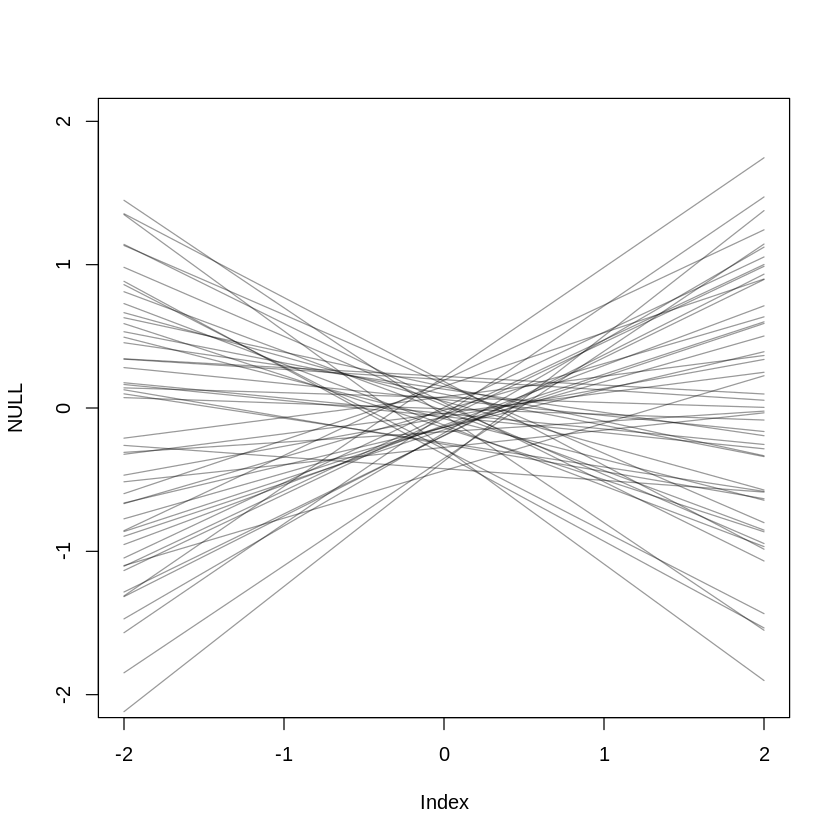

In [8]:
set.seed(10)
prior <- extract.prior( m5.2 )
mu <- link( m5.2 , post=prior , data=list( M=c(-2,2) ) )
plot( NULL , xlim=c(-2,2) , ylim=c(-2,2) )
for ( i in 1:50 ) lines( c(-2,2) , mu[i,] , col=col.alpha("black",0.4) )

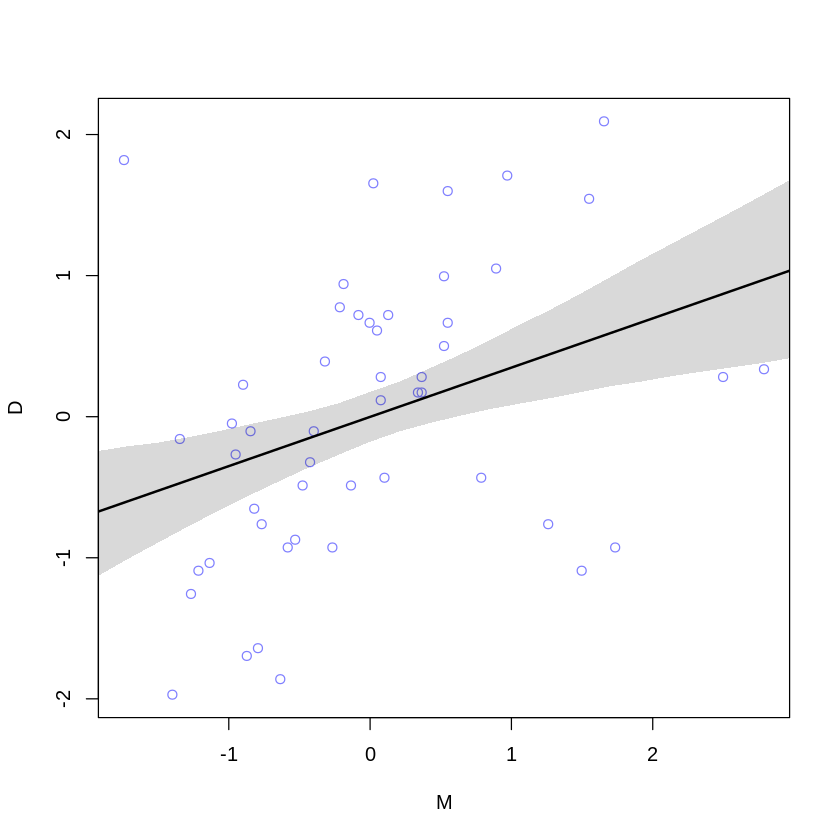

In [9]:
# compute percentile interval of mean
M_seq <- seq( from=-3 , to=3.2 , length.out=30 )
mu <- link( m5.2 , data=list(M=M_seq) )
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )

# plot it all
plot( D ~ M , data=d , col=rangi2 )
lines( M_seq , mu.mean , lwd=2 )
shade( mu.PI , M_seq )

Installing package into ‘/home/rer/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
Warning message:
“unable to access index for repository https://cloud.r-project.org/src/contrib:
  cannot open URL 'https://cloud.r-project.org/src/contrib/PACKAGES'”Warning message:
“package ‘dagitty’ is not available (for R version 3.6.1)”

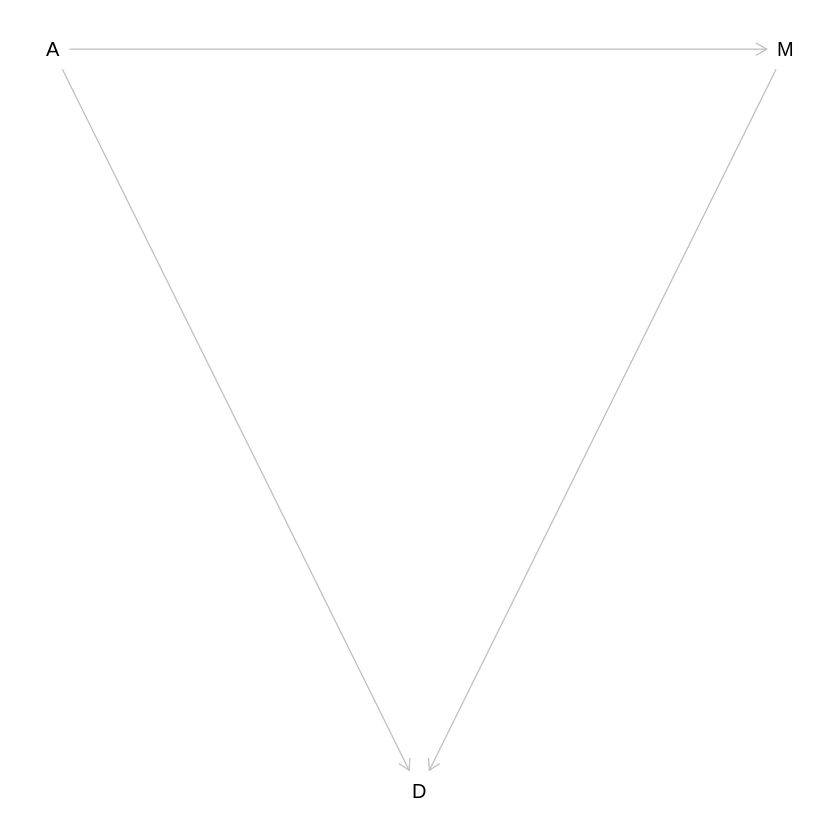

In [10]:
install.packages('dagitty')
library(dagitty)
dag5.1 <- dagitty( "dag {
                        A -> D
                        A -> M
                        M -> D
                        }")
coordinates(dag5.1) <- list( x=c(A=0,D=1,M=2) , y=c(A=0,D=1,M=0) )
plot( dag5.1 )

In [11]:
m5.3 <- quap(
            alist(
            D ~ dnorm( mu , sigma ) ,
            mu <- a + bM*M + bA*A ,
            a ~ dnorm( 0 , 0.2 ) ,
            bM ~ dnorm( 0 , 0.5 ) ,
            bA ~ dnorm( 0 , 0.5 ) ,
            sigma ~ dexp( 1 )
            ) , data = d )
            precis( m5.3 )
                

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-1.100372e-05,0.09708000,-0.1551636,0.1551416
bM,-6.537672e-02,0.15078010,-0.3063524,0.1755990
bA,-6.135168e-01,0.15099056,-0.8548289,-0.3722047
sigma,7.851600e-01,0.07785376,0.6607347,0.9095854


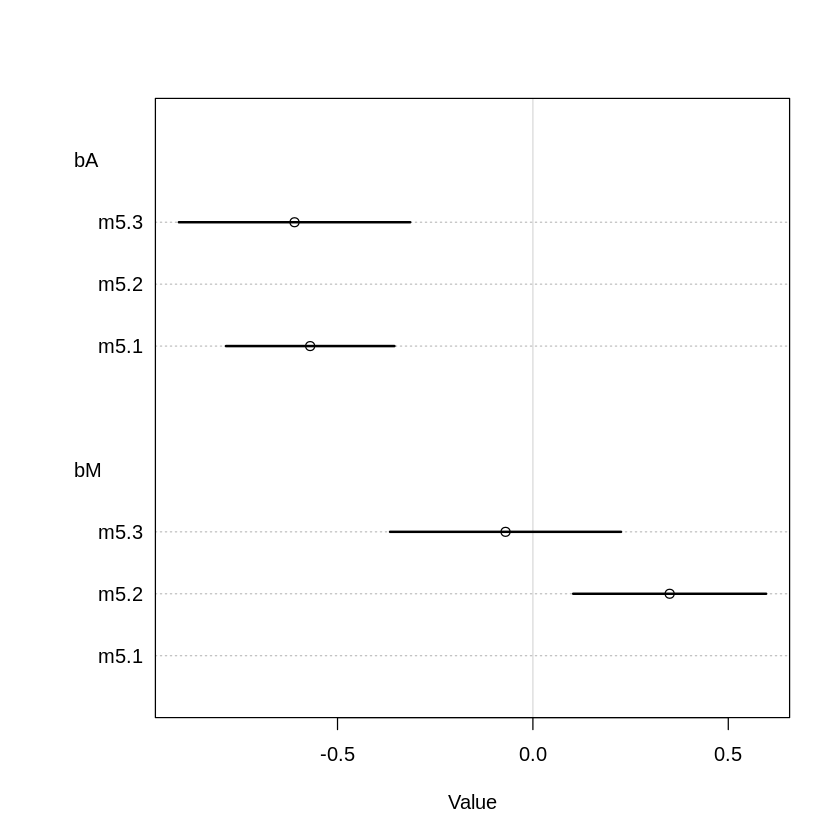

In [12]:
plot( coeftab(m5.1,m5.2,m5.3), par=c("bA","bM") )

In [13]:
m5.3b <- quap(
            alist(
            M ~ dnorm( mu , sigma ) ,
            mu <- a + bA*A ,
            a ~ dnorm( 0 , 0.2 ) ,
            bA ~ dnorm( 0 , 0.5 ) ,
            sigma ~ dexp( 1 )
            ) , data = d )
            precis( m5.3b )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,2.177279e-07,0.08684784,-0.1387994,0.1387998
bA,-6.947374e-01,0.09572694,-0.8477275,-0.5417473
sigma,6.817369e-01,0.06758006,0.5737309,0.7897429


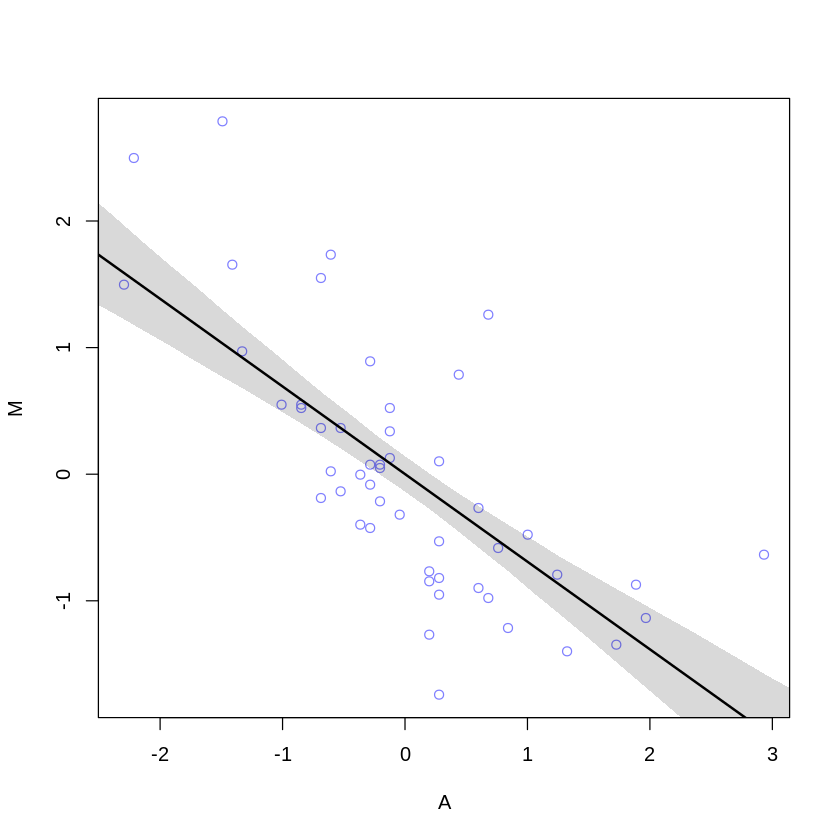

In [14]:
# compute percentile interval of mean
A_seq <- seq( from=-3 , to=3.2 , length.out=30 )
mu <- link( m5.3b , data=list(A=A_seq) )
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )

# plot it all
plot( M ~ A , data=d , col=rangi2 )
lines( M_seq , mu.mean , lwd=2 )
shade( mu.PI , A_seq )

In [15]:
#?WaffleDivorce

Simulate

In [16]:
N <- 50 # number of simulated States
age <- rnorm( N ) # sim A
mar <- rnorm( N , -age ) # sim A -> M
div <- rnorm( N , -age ) # sim A -> D

In [17]:
d_sim = data.frame(age, mar, div)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.03475898,0.1231758,-0.1620998,0.2316177
bA,-0.74312930,0.1687539,-1.0128306,-0.4734280
sigma,1.10275948,0.1090351,0.9285003,1.2770187


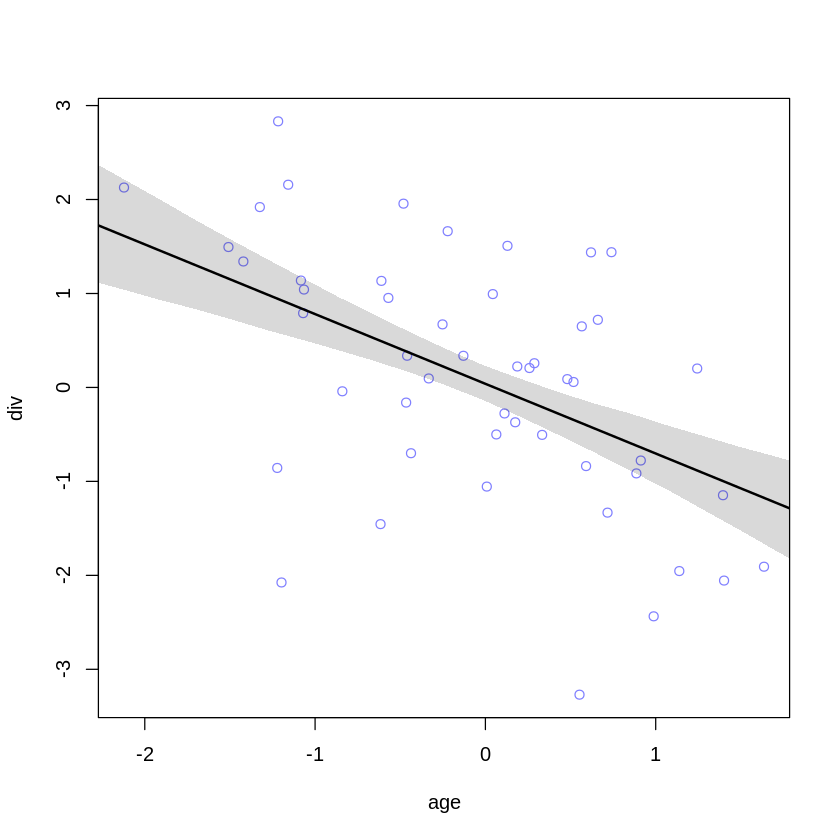

In [18]:
m5.1sim <- quap(
            alist(
                div ~ dnorm( mu , sigma ) ,
                mu <- a + bA * age ,
                a ~ dnorm( 0 , 0.2 ) ,
                bA ~ dnorm( 0 , 0.5 ) ,
                sigma ~ dexp( 1 )
                ) , data = d_sim )

precis(m5.1sim)

# compute percentile interval of mean
A_seq <- seq( from=-3 , to=3.2 , length.out=30 )
mu <- link( m5.1sim , data=list(age=A_seq) )
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )

# plot it all
plot( div ~ age , data=d_sim , col=rangi2 )
lines( A_seq , mu.mean , lwd=2 )
shade( mu.PI , A_seq )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.06638852,0.1352356,-0.14974413,0.2825212
bM,0.19147392,0.1488800,-0.04646502,0.4294129
sigma,1.29130886,0.1268619,1.08855905,1.4940587


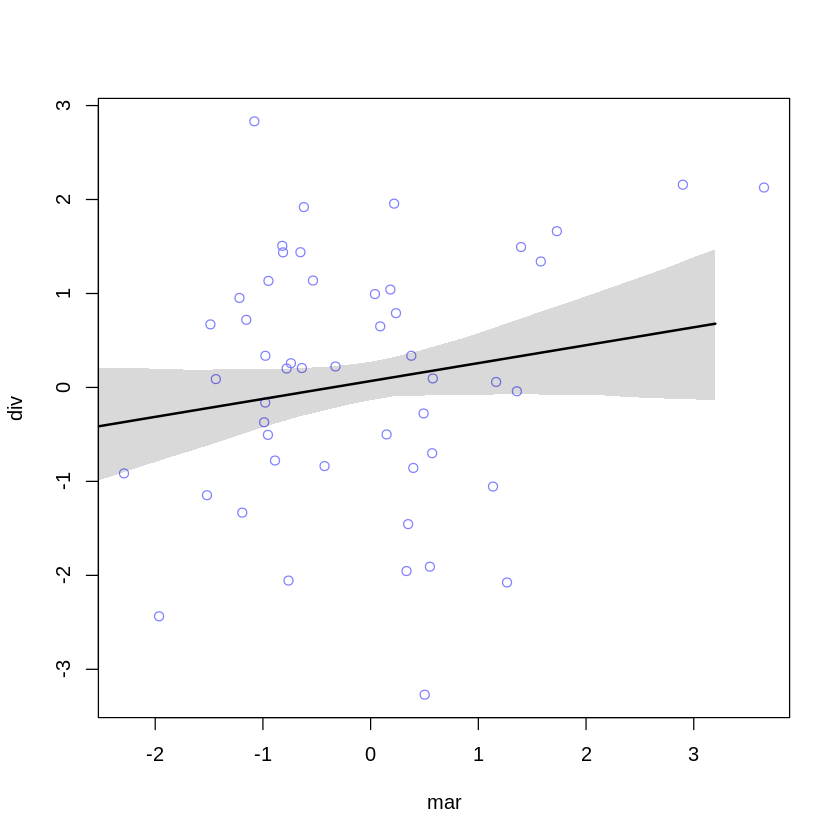

In [19]:
m5.2sim <- quap(
            alist(
                div ~ dnorm( mu , sigma ) ,
                mu <- a + bM * mar ,
                a ~ dnorm( 0 , 0.2 ) ,
                bM ~ dnorm( 0 , 0.5 ) ,
                sigma ~ dexp( 1 )
                ) , data = d_sim )

precis(m5.2sim)

# compute percentile interval of mean
M_seq <- seq( from=-3 , to=3.2 , length.out=30 )
mu <- link( m5.2sim , data=list(mar=M_seq) )
mu.mean <- apply( mu , 2, mean )
mu.PI <- apply( mu , 2 , PI )

# plot it all
plot( div ~ mar , data=d_sim , col=rangi2 )
lines( M_seq , mu.mean , lwd=2 )
shade( mu.PI , M_seq )

In [20]:
m5.3sim <- quap(
            alist(
            div ~ dnorm( mu , sigma ) ,
            mu <- a + bM*mar + bA*age ,
            a ~ dnorm( 0 , 0.2 ) ,
            bM ~ dnorm( 0 , 0.5 ) ,
            bA ~ dnorm( 0 , 0.5 ) ,
            sigma ~ dexp( 1 )
            ) , data = d_sim )

precis( m5.3sim )                

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.02645366,0.1231697,-0.1703954,0.2233027
bM,-0.09786297,0.1457082,-0.3307328,0.1350069
bA,-0.80557396,0.1912916,-1.1112948,-0.4998531
sigma,1.09363213,0.1084695,0.9202769,1.2669873


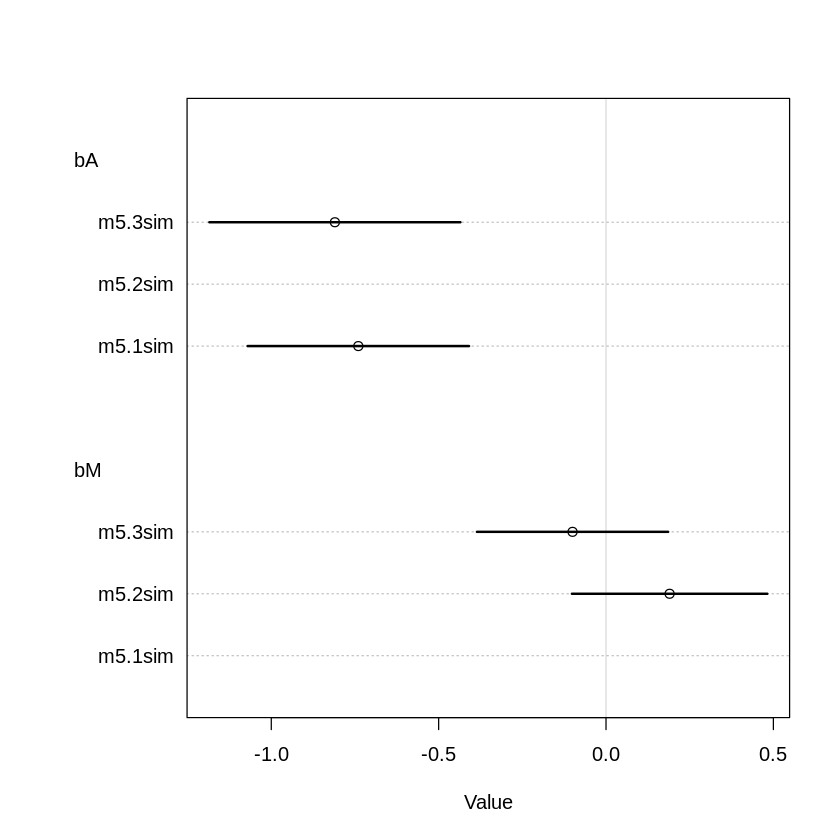

In [21]:
plot( coeftab(m5.1sim,m5.2sim,m5.3sim), par=c("bA","bM") )

In [97]:
m5.4 <- quap(
            alist(
            M ~ dnorm( mu , sigma ) ,
            mu <- a + bAM * A ,
            a ~ dnorm( 0 , 1 ) ,
            bAM ~ dnorm( 0 , 1 ) ,
            sigma ~ dexp( 1 )
            ) , data = d )

precis(m5.4)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.05751837,0.1268901,-0.1452766,0.2603133
bAM,-0.06491853,0.1274317,-0.2685791,0.1387420
sigma,1.37778495,0.0896600,1.2344910,1.5210789


In [23]:
mu <- link(m5.4)
mu_mean <- apply( mu , 2 , mean )
mu_resid <- d$M - mu_mean

Code 5.13

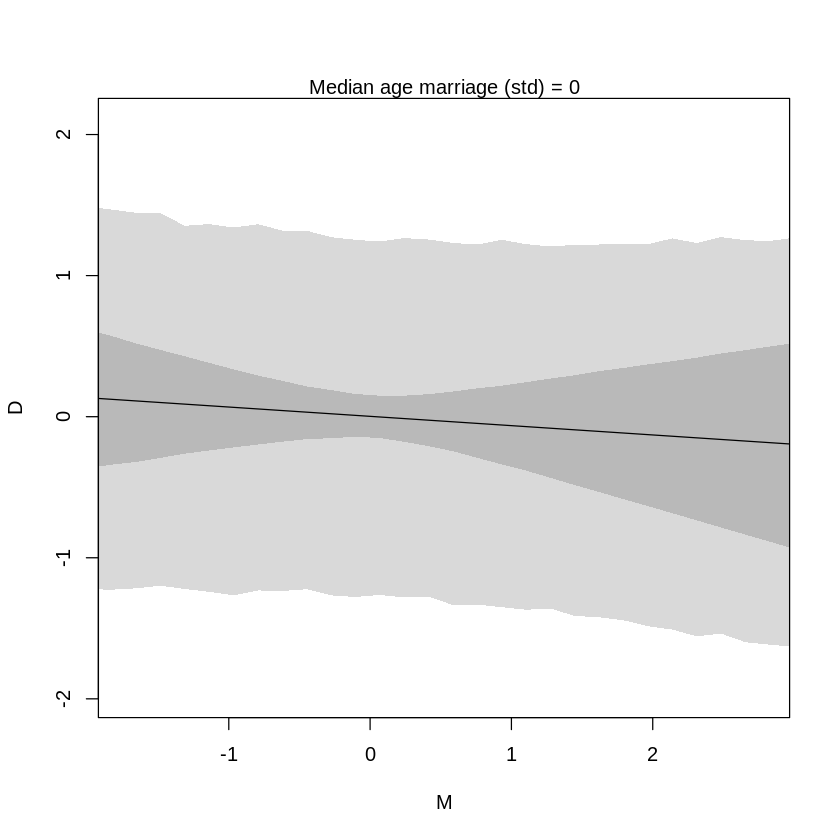

In [24]:
# prepare new counterfactual data
M_seq <- seq( from=-2 , to=3 , length.out=30 )
pred_data <- data.frame( M = M_seq , A = 0 )

# compute counterfactual mean divorce (mu)
mu <- link( m5.3 , data=pred_data )
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

# simulate counterfactual divorce outcomes
D_sim <- sim( m5.3 , data=pred_data , n=1e4 )
D_PI <- apply( D_sim , 2 , PI )

# display predictions, hiding raw data with type="n"
plot( D ~ M , data=d , type="n" )
mtext( "Median age marriage (std) = 0" )

lines( M_seq , mu_mean )
shade( mu_PI , M_seq )
shade( D_PI , M_seq )

In [25]:
# call link without specifying new data
# so it uses original data
mu <- link( m5.3 )

# summarize samples across cases
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )

# simulate observations
# again no new data, so uses original data
D_sim <- sim( m5.3 , n=1e4 )
D_PI <- apply( D_sim , 2 , PI )

integer(0)

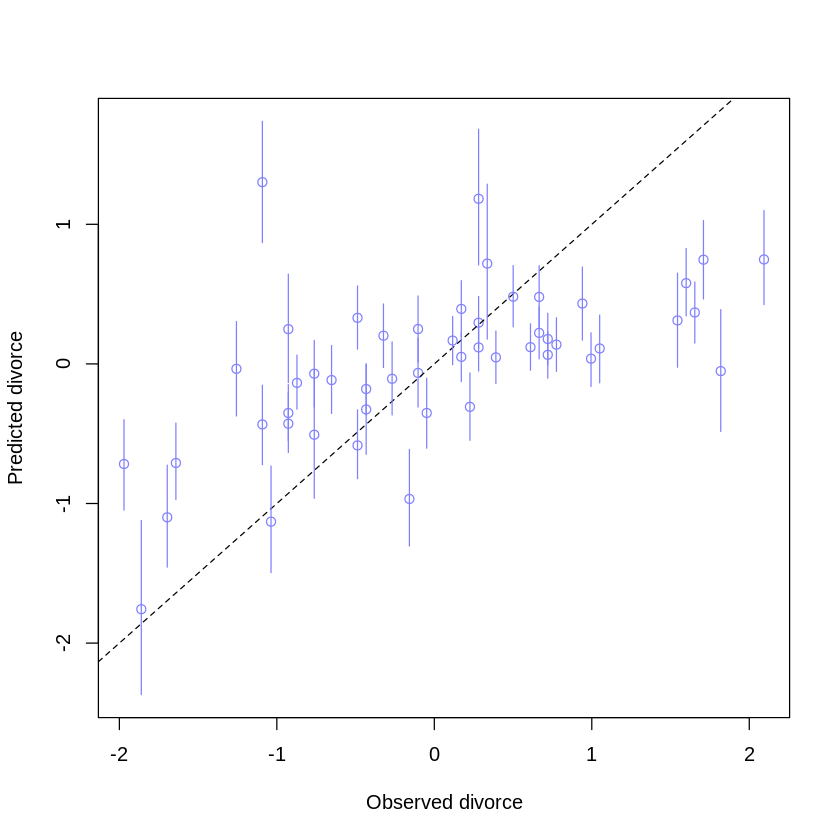

In [26]:
plot( mu_mean ~ d$D , col=rangi2 , ylim=range(mu_PI) ,
xlab="Observed divorce" , ylab="Predicted divorce" )
abline( a=0 , b=1 , lty=2 )
for ( i in 1:nrow(d) ) lines( rep(d$D[i],2) , mu_PI[,i] , col=rangi2 )
identify( x=d$D , y=mu_mean , labels=d$Loc )

In [27]:
N <- 100                                #number of cases
x_real <- rnorm( N )                    #x_real as Gaussian with mean 0 and stddev 1
x_spur <- rnorm( N , x_real )           #x_spur as Gaussian with mean=x_real
y <- rnorm( N , x_real )                #y as Gaussian with mean=x_real
d <- data.frame(y,x_real,x_spur)        #bind all together in data frame

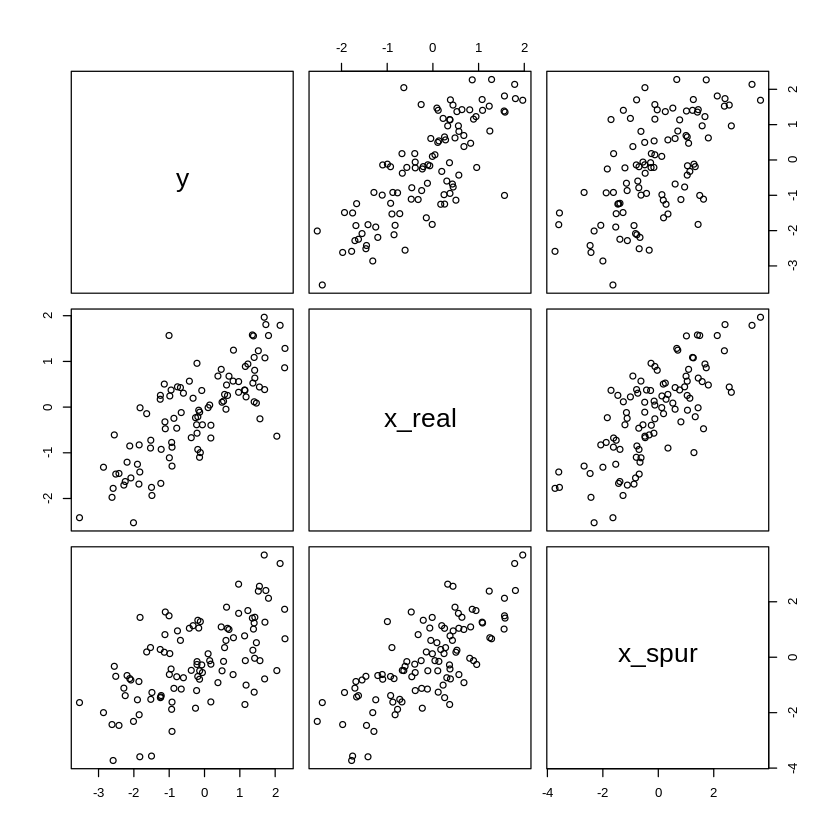

In [28]:
pairs(d)

Code 5.18

In [29]:
library(rethinking)
data(milk)
d <- milk
str(d)

'data.frame':	29 obs. of  8 variables:
 $ clade         : Factor w/ 4 levels "Ape","New World Monkey",..: 4 4 4 4 4 2 2 2 2 2 ...
 $ species       : Factor w/ 29 levels "A palliata","Alouatta seniculus",..: 11 8 9 10 16 2 1 6 28 27 ...
 $ kcal.per.g    : num  0.49 0.51 0.46 0.48 0.6 0.47 0.56 0.89 0.91 0.92 ...
 $ perc.fat      : num  16.6 19.3 14.1 14.9 27.3 ...
 $ perc.protein  : num  15.4 16.9 16.9 13.2 19.5 ...
 $ perc.lactose  : num  68 63.8 69 71.9 53.2 ...
 $ mass          : num  1.95 2.09 2.51 1.62 2.19 5.25 5.37 2.51 0.71 0.68 ...
 $ neocortex.perc: num  55.2 NA NA NA NA ...


In [30]:
d

clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16
Strepsirrhine,E macaco,0.51,19.27,16.91,63.82,2.09,NA
Strepsirrhine,E mongoz,0.46,14.11,16.85,69.04,2.51,NA
Strepsirrhine,E rubriventer,0.48,14.91,13.18,71.91,1.62,NA
Strepsirrhine,Lemur catta,0.60,27.28,19.50,53.22,2.19,NA
New World Monkey,Alouatta seniculus,0.47,21.22,23.58,55.20,5.25,64.54
New World Monkey,A palliata,0.56,29.66,23.46,46.88,5.37,64.54
New World Monkey,Cebus apella,0.89,53.41,15.80,30.79,2.51,67.64
New World Monkey,Saimiri boliviensis,0.91,46.08,23.34,30.58,0.71,NA


In [31]:
d$K <- scale( d$kcal.per.g )
d$N <- scale( d$neocortex.perc )
d$M <- scale( log(d$mass) )

In [32]:
d

clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc,K,N,M
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16,-0.9400408,-2.080196025,-0.4558357
Strepsirrhine,E macaco,0.51,19.27,16.91,63.82,2.09,NA,-0.8161263,NA,-0.4150024
Strepsirrhine,E mongoz,0.46,14.11,16.85,69.04,2.51,NA,-1.1259125,NA,-0.3071581
Strepsirrhine,E rubriventer,0.48,14.91,13.18,71.91,1.62,NA,-1.0019980,NA,-0.5650254
Strepsirrhine,Lemur catta,0.60,27.28,19.50,53.22,2.19,NA,-0.2585112,NA,-0.3874772
New World Monkey,Alouatta seniculus,0.47,21.22,23.58,55.20,5.25,64.54,-1.0639553,-0.508641289,0.1274408
New World Monkey,A palliata,0.56,29.66,23.46,46.88,5.37,64.54,-0.5063402,-0.508641289,0.1407505
New World Monkey,Cebus apella,0.89,53.41,15.80,30.79,2.51,67.64,1.5382486,0.010742472,-0.3071581
New World Monkey,Saimiri boliviensis,0.91,46.08,23.34,30.58,0.71,NA,1.6621631,NA,-1.0508443


In [33]:
#m5.5_draft <- quap(
#                    alist(
#                    K ~ dnorm( mu , sigma ) ,
#                    mu <- a + bN*N ,
#                    a ~ dnorm( 0 , 1 ) ,
#                    bN ~ dnorm( 0 , 1 ) ,
#                    sigma ~ dexp( 1 )
#                    ) , data=d )

In [34]:
d$neocortex.perc

[1] 55.16    NA    NA    NA    NA 64.54 64.54 67.64    NA 68.85 58.85 61.69
[13] 60.32    NA    NA 69.97    NA 70.41    NA 73.40    NA 67.53    NA 71.26
[25] 72.60    NA 70.24 76.30 75.49

In [35]:
dcc <- d[ complete.cases(d$K,d$N,d$M) , ]

In [36]:
#dcc2 <- d[ complete.cases(d), ]     #Simpler way to achieve it...

In [37]:
m5.5_draft <- quap(
                    alist(
                    K ~ dnorm( mu , sigma ) ,
                    mu <- a + bN*N ,
                    a ~ dnorm( 0 , 1 ) ,
                    bN ~ dnorm( 0 , 1 ) ,
                    sigma ~ dexp( 1 )
                    ) , data=dcc )

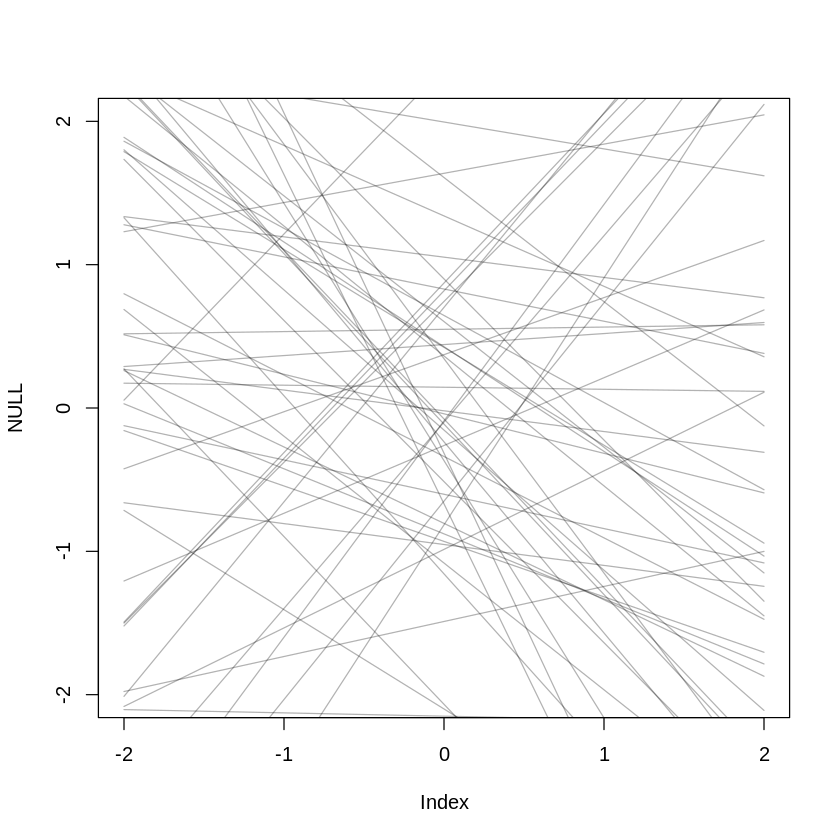

In [38]:
prior <- extract.prior( m5.5_draft )
xseq <- c(-2,2)
mu <- link( m5.5_draft , post=prior , data=list(N=xseq) )
plot( NULL , xlim=xseq , ylim=xseq )
for ( i in 1:50 ) lines( xseq , mu[i,] , col=col.alpha("black",0.3) )

In [39]:
m5.5 <- quap(
            alist(
            K ~ dnorm( mu , sigma ) ,
            mu <- a + bN*N ,
            a ~ dnorm( 0 , 0.2 ) ,
            bN ~ dnorm( 0 , 0.5 ) ,
            sigma ~ dexp( 1 )
            ) , data=dcc )     

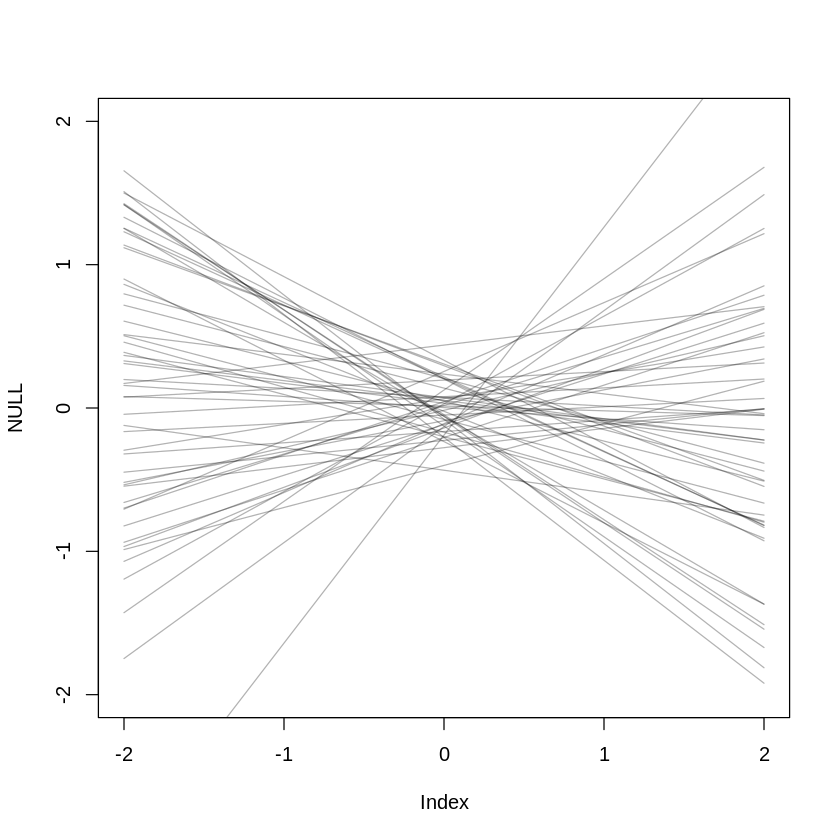

In [40]:
prior <- extract.prior( m5.5 )
xseq <- c(-2,2)
mu <- link( m5.5, post=prior , data=list(N=xseq) )
plot( NULL , xlim=xseq , ylim=xseq )
for ( i in 1:50 ) lines( xseq , mu[i,] , col=col.alpha("black",0.3) )

In [41]:
precis( m5.5 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.03977621,0.1544855,-0.2071214,0.2866739
bN,0.13322979,0.2237286,-0.2243318,0.4907913
sigma,0.99971821,0.1646657,0.7365507,1.2628858


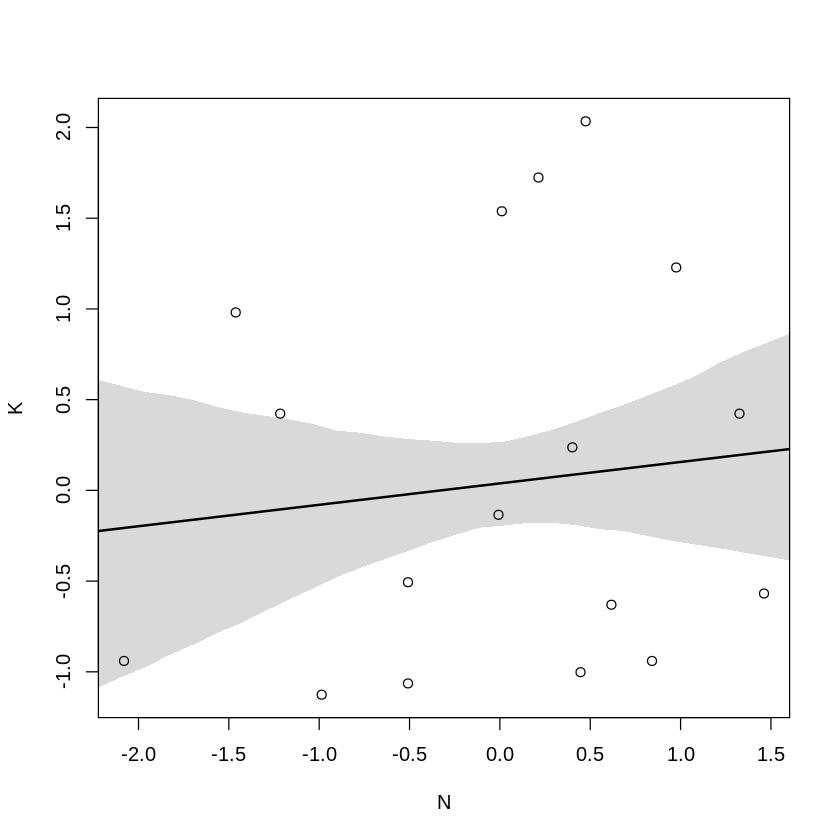

In [42]:
xseq <- seq( from=min(dcc$N)-0.15 , to=max(dcc$N)+0.15 , length.out=30 )
mu <- link( m5.5 , data=list(N=xseq) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( K ~ N , data=dcc )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

In [43]:
m5.6 <- quap(
            alist(
            K ~ dnorm( mu , sigma ) ,
            mu <- a + bM*M ,
            a ~ dnorm( 0 , 0.2 ) ,
            bM ~ dnorm( 0 , 0.5 ) ,
            sigma ~ dexp( 1 )
            ) , data=dcc )

precis(m5.6)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.04654142,0.1512800,-0.1952333,0.2883161
bM,-0.28253561,0.1928818,-0.5907979,0.0257267
sigma,0.94927922,0.1570614,0.6982647,1.2002937


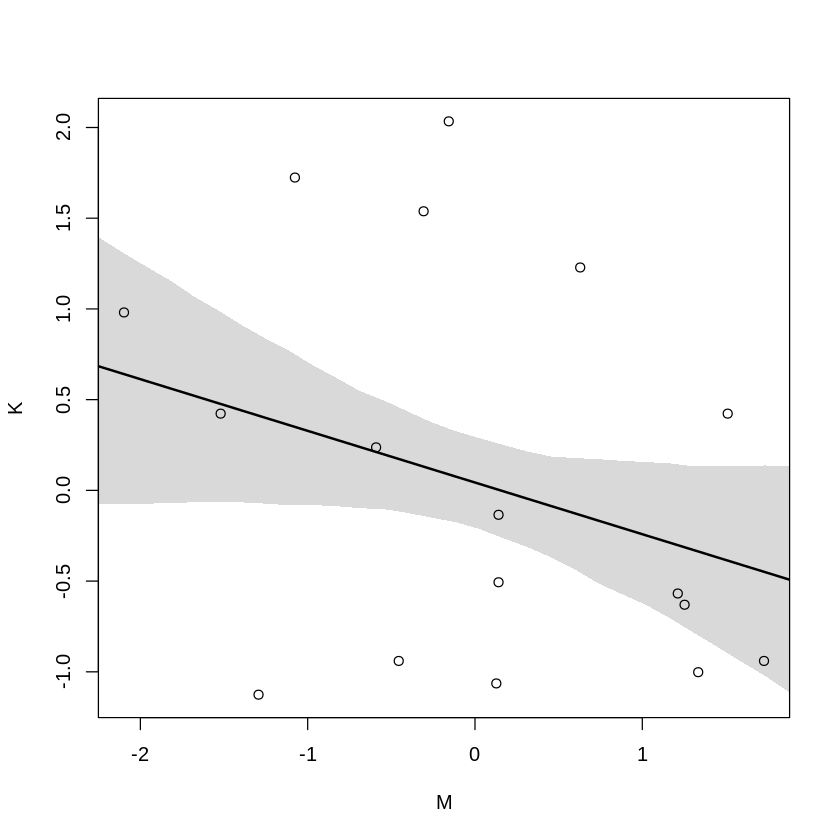

In [44]:
xseq <- seq( from=min(dcc$M)-0.15 , to=max(dcc$M)+0.15 , length.out=30 )
mu <- link( m5.6 , data=list(M=xseq) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( K ~ M , data=dcc )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

In [45]:
m5.7 <- quap(
            alist(
            K ~ dnorm( mu , sigma ) ,
            mu <- a + bN*N + bM*M ,
            a ~ dnorm( 0 , 0.2 ) ,
            bN ~ dnorm( 0 , 0.5 ) ,
            bM ~ dnorm( 0 , 0.5 ) ,
            sigma ~ dexp( 1 )
            ) , data=dcc )

precis(m5.7)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.06799171,0.1339986,-0.1461640,0.2821474
bN,0.67511803,0.2482985,0.2782891,1.0719470
bM,-0.70299110,0.2207869,-1.0558512,-0.3501310
sigma,0.73801390,0.1324617,0.5263146,0.9497132


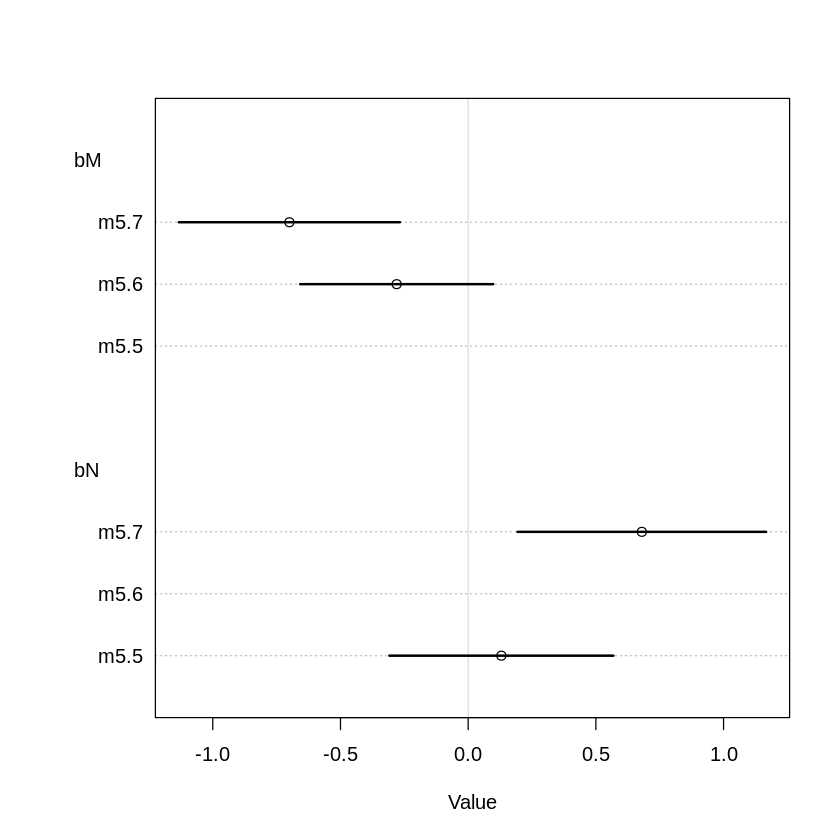

In [46]:
plot( coeftab( m5.5 , m5.6 , m5.7 ) , pars=c("bM","bN") )

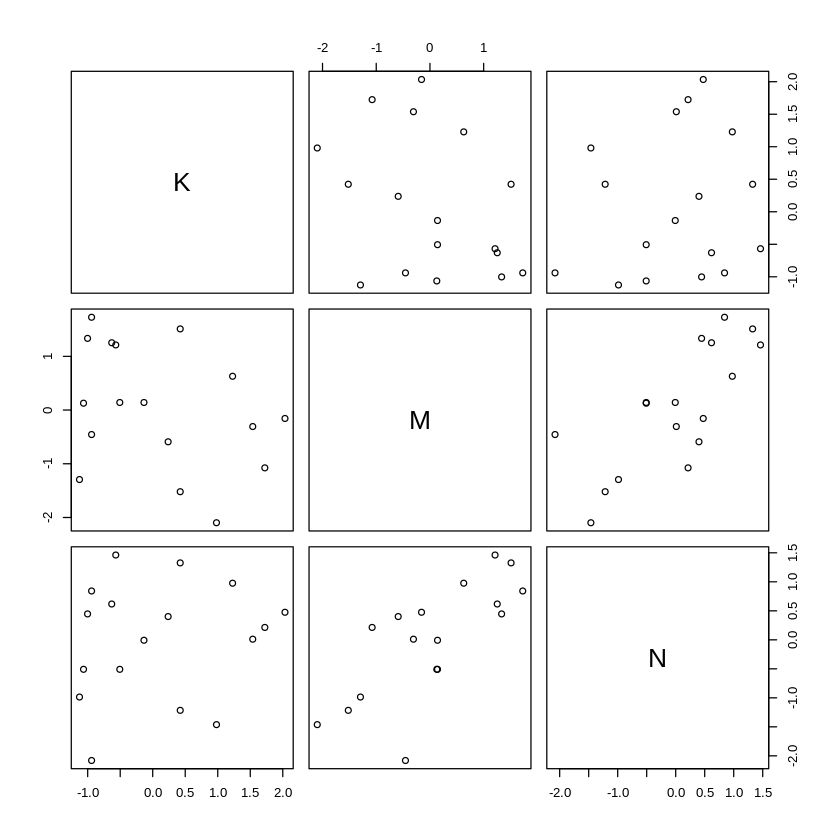

In [47]:
pairs( ~K + M + N , dcc )

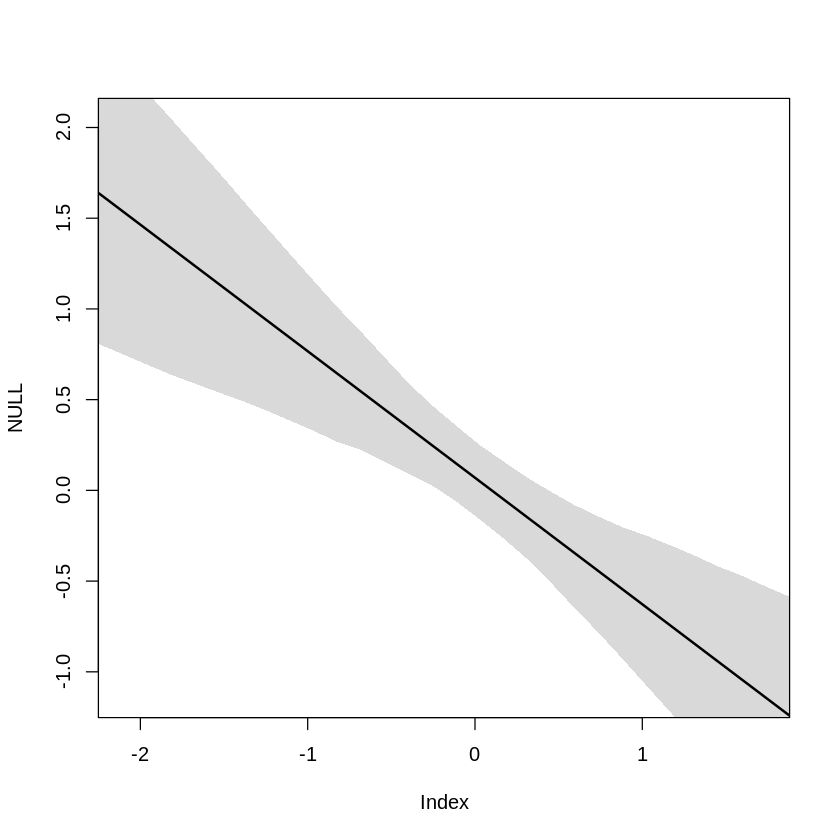

In [48]:
xseq <- seq( from=min(dcc$M)-0.15 , to=max(dcc$M)+0.15 , length.out=30 )
mu <- link( m5.7 , data=data.frame( M=xseq , N=0 ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(dcc$M) , ylim=range(dcc$K) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

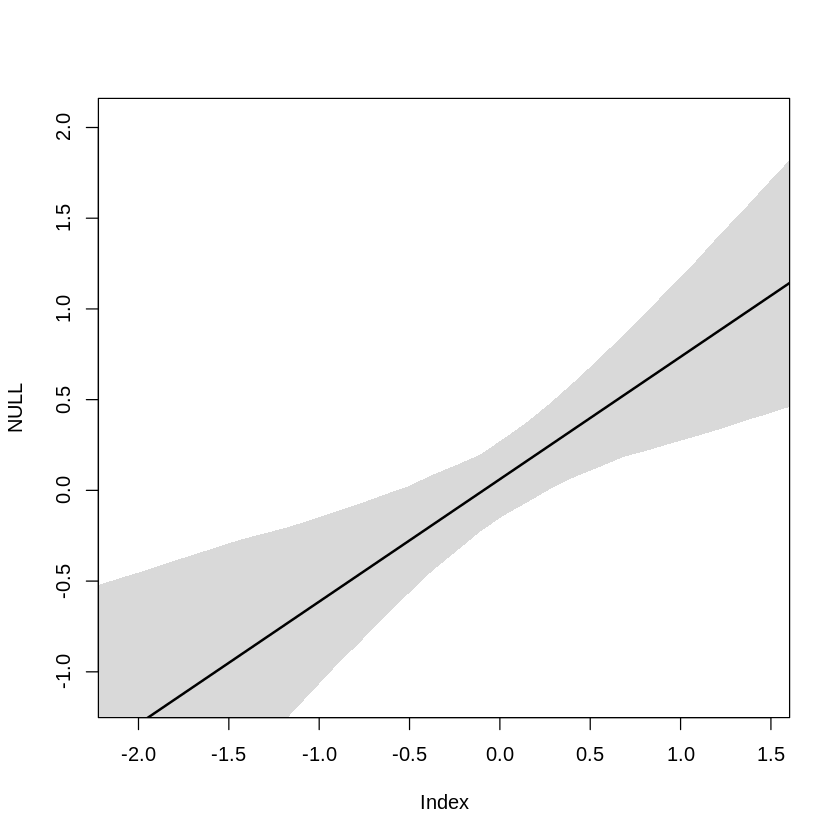

In [49]:
xseq <- seq( from=min(dcc$N)-0.15 , to=max(dcc$N)+0.15 , length.out=30 )
mu <- link( m5.7 , data=data.frame( M=0 , N=xseq ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(dcc$N) , ylim=range(dcc$K) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

Code 5.32

In [50]:
#Simulation Scenario 1

# M -> K <- N
# M -> N
#n <- 100
#M <- rnorm( n )
#N <- rnorm( n , M )
#K <- rnorm( n , N - M )
#d_sim <- data.frame(K=K,N=N,M=M)



#Simulation Scenario 2

# M -> K <- N
# N -> M
#n <- 100
#N <- rnorm( n )
#M <- rnorm( n , N )
#K <- rnorm( n , N - M )
#d_sim <- data.frame(K=K,N=N,M=M)



#Simulation Scenario 3

# M -> K <- N
# M <- U -> N
n <- 100
U <- rnorm( n )
N <- rnorm( n , U )
M <- rnorm( n , U )
K <- rnorm( n , N - M )
d_sim <- data.frame(K=K,N=N,M=M)


In [51]:
m5.5sim <- quap(
            alist(
            K ~ dnorm( mu , sigma ) ,
            mu <- a + bN*N ,
            a ~ dnorm( 0 , 0.2 ) ,
            bN ~ dnorm( 0 , 0.5 ) ,
            sigma ~ dexp( 1 )
            ) , data=d_sim )

In [52]:
precis(m5.5sim)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.09799736,0.1251137,-0.1019585,0.2979532
bN,0.33527372,0.1186516,0.1456456,0.5249018
sigma,1.59830831,0.1118092,1.4196156,1.7770010


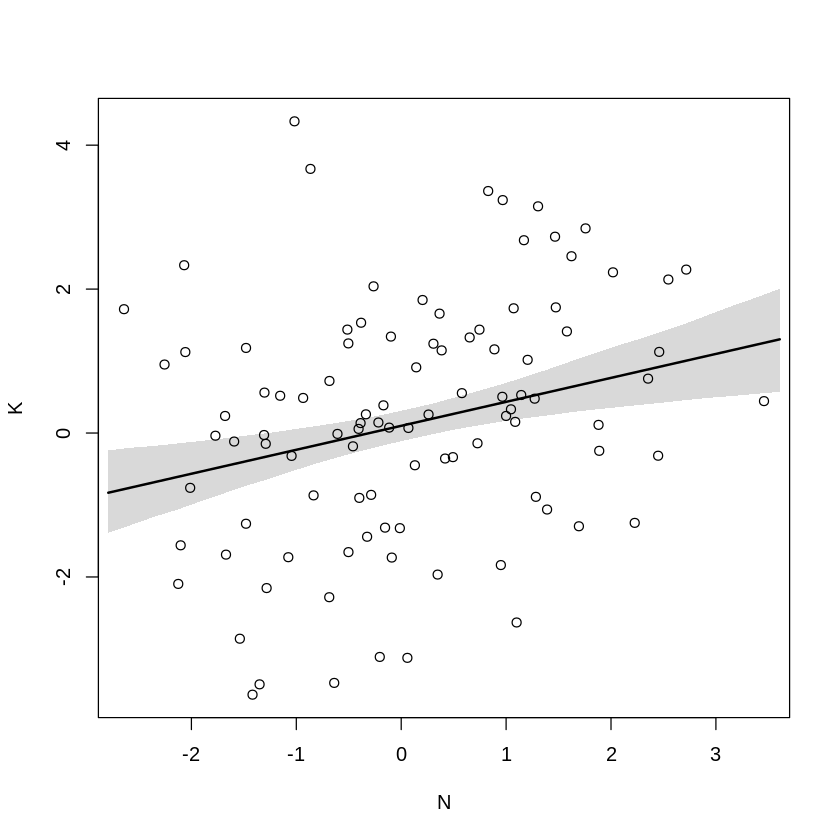

In [53]:
xseq <- seq( from=min(d_sim$N)-0.15 , to=max(d_sim$N)+0.15 , length.out=30 )
mu <- link( m5.5sim , data=list(N=xseq) )                
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( K ~ N , data=d_sim )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )        

In [54]:
m5.6sim <- quap(
            alist(
            K ~ dnorm( mu , sigma ) ,
            mu <- a + bM*M ,
            a ~ dnorm( 0 , 0.2 ) ,
            bM ~ dnorm( 0 , 0.5 ) ,
            sigma ~ dexp( 1 )
            ) , data=d_sim )

precis(m5.6sim)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.09912757,0.1203569,-0.09322602,0.2914812
bM,-0.49434583,0.1057243,-0.66331362,-0.3253780
sigma,1.50334103,0.1052574,1.33511937,1.6715627


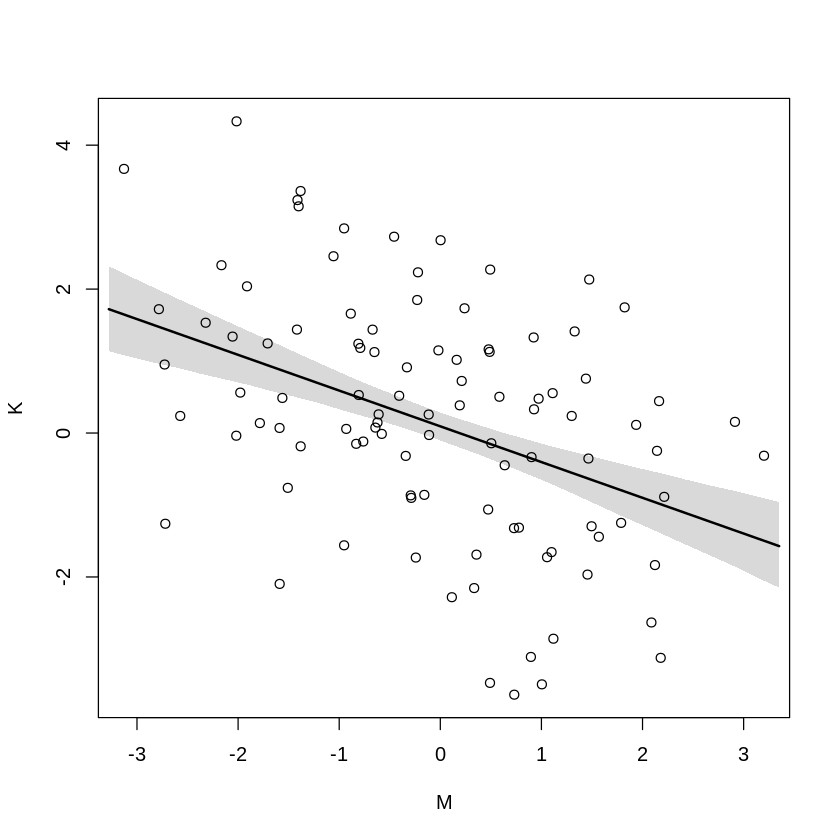

In [55]:
xseq <- seq( from=min(d_sim$M)-0.15 , to=max(d_sim$M)+0.15 , length.out=30 )
mu <- link( m5.6sim , data=list(M=xseq) )                
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( K ~ M , data=d_sim )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )         

In [56]:
m5.7sim <- quap(
            alist(
            K ~ dnorm( mu , sigma ) ,
            mu <- a + bN*N + bM*M ,
            a ~ dnorm( 0 , 0.2 ) ,
            bN ~ dnorm( 0 , 0.5 ) ,
            bM ~ dnorm( 0 , 0.5 ) ,
            sigma ~ dexp( 1 )
            ) , data=d_sim )

precis(m5.7sim)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.03429777,0.09549344,-0.1183192,0.1869147
bN,0.92579603,0.09808601,0.7690357,1.0825564
bM,-0.98834896,0.09246271,-1.1361222,-0.8405757
sigma,1.07930215,0.07601194,0.9578204,1.2007839


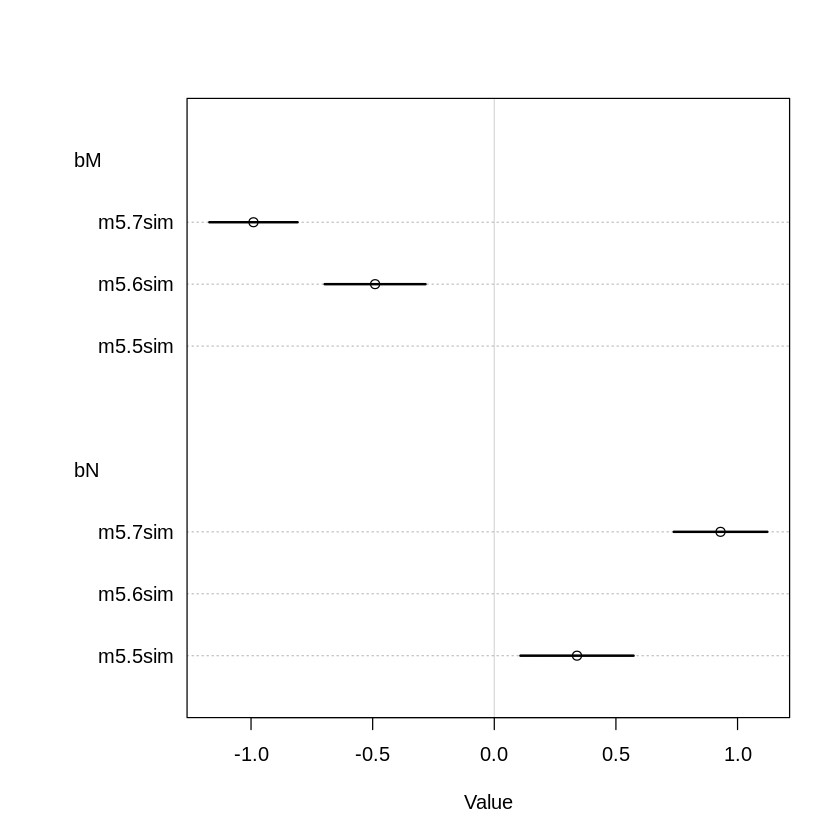

In [57]:
plot( coeftab( m5.5sim , m5.6sim , m5.7sim ) , pars=c("bM","bN") )

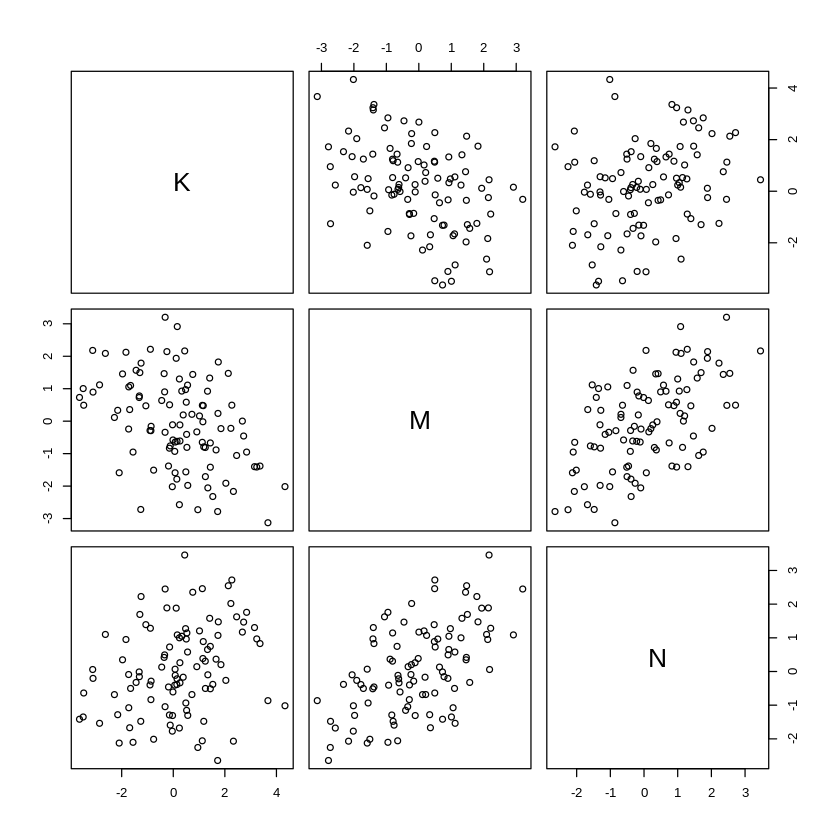

In [58]:
pairs( ~K + M + N , d_sim )

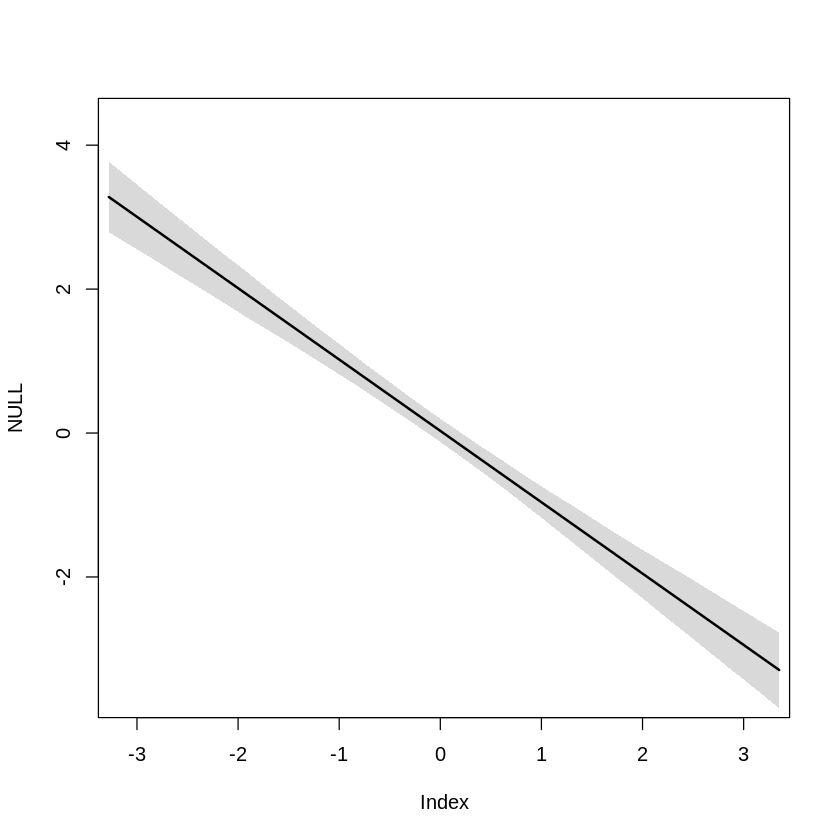

In [59]:
xseq <- seq( from=min(d_sim$M)-0.15 , to=max(d_sim$M)+0.15 , length.out=30 )
mu <- link( m5.7sim , data=data.frame( M=xseq , N=0 ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(d_sim$M) , ylim=range(d_sim$K) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

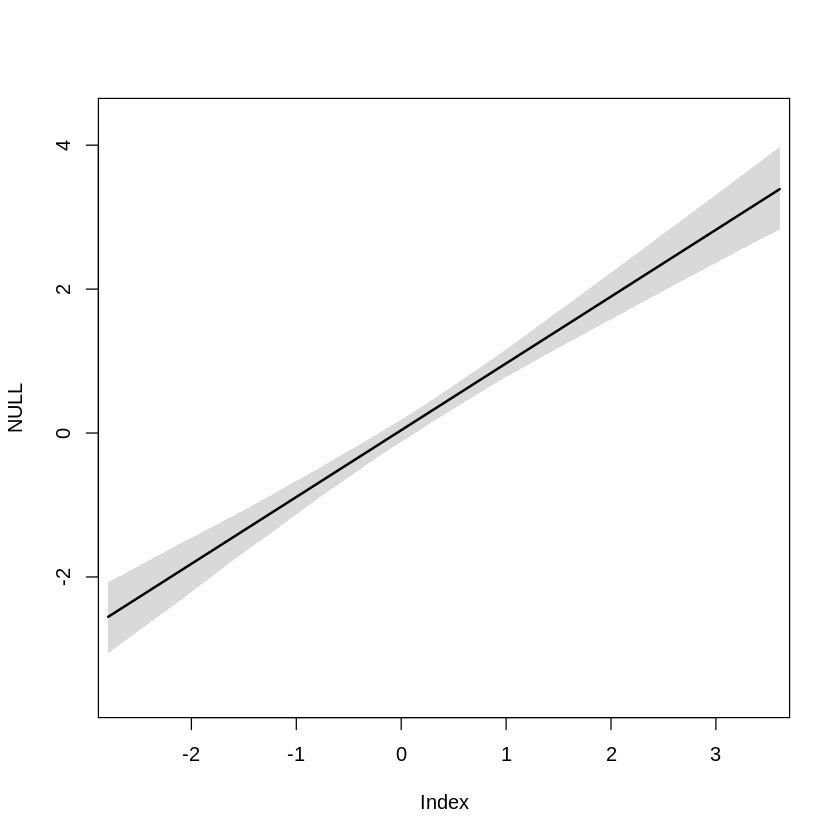

In [60]:
xseq <- seq( from=min(d_sim$N)-0.15 , to=max(d_sim$N)+0.15 , length.out=30 )
mu <- link( m5.7sim , data=data.frame( M=0 , N=xseq ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(d_sim$N) , ylim=range(d_sim$K) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

In [61]:
data(Howell1)
d <- Howell1
str(d)

'data.frame':	544 obs. of  4 variables:
 $ height: num  152 140 137 157 145 ...
 $ weight: num  47.8 36.5 31.9 53 41.3 ...
 $ age   : num  63 63 65 41 51 35 32 27 19 54 ...
 $ male  : int  1 0 0 1 0 1 0 1 0 1 ...


In [62]:
mu_female <- rnorm(1e4,178,20)
mu_male <- rnorm(1e4,178,20) + rnorm(1e4,0,10)
precis( data.frame( mu_female , mu_male ) )

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
mu_female,178.2074,20.08766,145.9526,210.4933,▁▁▃▇▇▂▁▁
mu_male,177.9171,22.39794,142.1850,213.8556,▁▁▁▃▇▇▂▁▁


In [63]:
d$sex <- ifelse( d$male==1 , 2 , 1 )
str( d$sex )

 num [1:544] 2 1 1 2 1 2 1 2 1 2 ...


In [64]:
m5.8 <- quap(
            alist(
            height ~ dnorm( mu , sigma ) ,
            mu <- a[sex] ,
            a[sex] ~ dnorm( 178 , 20 ) ,
            sigma ~ dunif( 0 , 50 )
            ) , data=d )
precis( m5.8 , depth=2 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],134.9109,1.6068951,132.34274,137.47900
a[2],142.5733,1.6974293,139.86044,145.28608
sigma,27.3093,0.8279917,25.98601,28.63259


In [65]:
post <- extract.samples(m5.8)
post$diff_fm <- post$a[,1] - post$a[,2]
precis( post , depth=2 )

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
sigma,27.305496,0.8222397,25.98224,28.613319,▁▁▁▁▃▅▇▇▃▂▁▁▁▁▁
a[1],134.918881,1.6340207,132.28739,137.502516,▁▁▁▁▂▅▇▇▅▂▁▁▁
a[2],142.576648,1.6836215,139.88585,145.328979,▁▁▁▂▃▇▇▇▃▂▁▁▁
diff_fm,-7.657767,2.3382016,-11.39148,-4.006046,▁▁▁▃▇▇▅▁▁▁▁


In [66]:
data(milk)
d <- milk
unique(d$clade)

[1] Strepsirrhine    New World Monkey Old World Monkey Ape             
Levels: Ape New World Monkey Old World Monkey Strepsirrhine

In [67]:
d$clade_id <- as.integer( d$clade )

In [68]:
d

clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc,clade_id
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16,4
Strepsirrhine,E macaco,0.51,19.27,16.91,63.82,2.09,NA,4
Strepsirrhine,E mongoz,0.46,14.11,16.85,69.04,2.51,NA,4
Strepsirrhine,E rubriventer,0.48,14.91,13.18,71.91,1.62,NA,4
Strepsirrhine,Lemur catta,0.60,27.28,19.50,53.22,2.19,NA,4
New World Monkey,Alouatta seniculus,0.47,21.22,23.58,55.20,5.25,64.54,2
New World Monkey,A palliata,0.56,29.66,23.46,46.88,5.37,64.54,2
New World Monkey,Cebus apella,0.89,53.41,15.80,30.79,2.51,67.64,2
New World Monkey,Saimiri boliviensis,0.91,46.08,23.34,30.58,0.71,NA,2


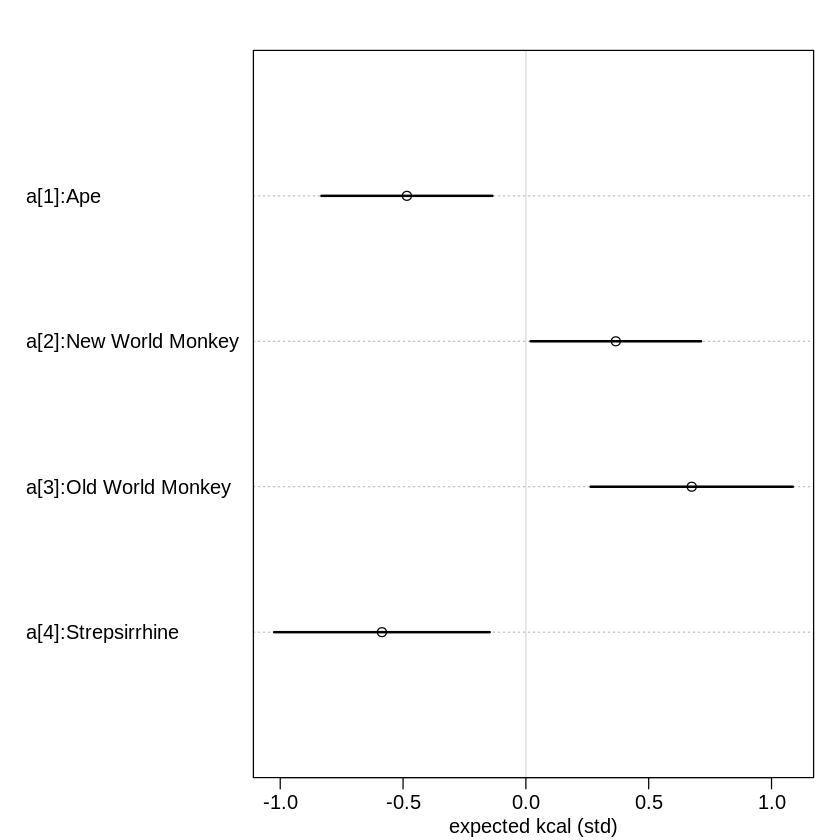

In [69]:
d$K <- scale( d$kcal.per.g )

m5.9 <- quap(
    alist(
    K ~ dnorm( mu , sigma ),
    mu <- a[clade_id],
    a[clade_id] ~ dnorm( 0 , 0.5 ),
    sigma ~ dexp( 1 )
    ) , data=d )

labels <- paste( "a[" , 1:4 , "]:" , levels(d$clade) , sep="" )
plot( precis( m5.9 , depth=2 , pars="a" ) , labels=labels , xlab="expected kcal (std)" )

In [70]:
set.seed(63)
d$house <- sample( rep(1:4,each=8) , size=nrow(d) )

In [71]:
m5.10 <- quap(
            alist(
            K ~ dnorm( mu , sigma ),
            mu <- a[clade_id] + h[house],
            a[clade_id] ~ dnorm( 0 , 0.5 ),
            h[house] ~ dnorm( 0 , 0.5 ),
            sigma ~ dexp( 1 )
            ) , data=d )

In [72]:
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
clade,NaN,NA,NA,NA,
species,NaN,NA,NA,NA,
kcal.per.g,6.417241e-01,0.1614016,0.465400,0.914600,▇▅▂▁▁▅▂▁▁▂▁
perc.fat,3.399034e+01,14.2866705,14.542000,53.824000,▁▁▂▃▂▅▂▇▂▂▇▁
perc.protein,1.640345e+01,4.8468777,9.702000,23.515200,▁▂▂▇▃▃▂▃▃▁
perc.lactose,4.960621e+01,14.0551735,30.693400,71.115000,▁▇▃▃▃▅▂▂▃▃
mass,1.472690e+01,24.7704693,0.401000,66.210800,▇▁▁▁▁▁▁▁▁▁
neocortex.perc,6.757588e+01,5.9686117,58.407200,75.587200,▂▁▂▅▁▅▅▅▇▅▂▂
clade_id,2.241379e+00,1.0907131,1.000000,4.000000,▇▇▁▅▁▃


Practice 5M4

In [73]:
# load data and copy
library(rethinking)
data(WaffleDivorce)
d <- WaffleDivorce

In [74]:
install.packages("rvest")
library(rvest)

url = "https://en.wikipedia.org/wiki/The_Church_of_Jesus_Christ_of_Latter-day_Saints_membership_statistics_(United_States)"
#url2 = read_html("https://en.wikipedia.org/wiki/The_Church_of_Jesus_Christ_of_Latter-day_Saints_membership_statistics_(United_States)")

XPath = "//*[@id=\"mw-content-text\"]/div/table[2]"

mormons <- url %>%
  xml2::read_html() %>%
  html_nodes(xpath=XPath) %>%
  html_table()
mormons <- mormons[[1]]

head(mormons)

Installing package into ‘/home/rer/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
Loading required package: xml2


State,Membership,Population,LDS,Temples,Missions,Districts,Stakes,Wards,Branches,Congregations,Family History Centers
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
Alabama,"37,913","4,887,871",0.78%,1,1,0,7,45,31,76,44
Alaska,"33,298","737,438",4.52%,1,1,0,8,59,21,80,15
Arizona,"432,161","7,171,646",6.03%,6,6,0,115,821,83,904,74
Arkansas,"31,765","3,013,825",1.05%,0,1,0,7,42,27,69,25
California,"761,054","39,557,045",1.92%,8,18,0,154,"1,110",130,"1,240",228
Colorado,"150,958","5,695,564",2.65%,2,4,0,35,277,28,305,64


In [75]:
rownames(d) <- d$Location
rownames(mormons) <- mormons$State

In [76]:
library(stringr)
for (state in d$Location) {
    d[state, "LDS"] <- as.double(str_replace_all(mormons[state,"LDS"], "[%]" , "")) #LDS percent
    }

# standardize variables
d$A <- scale( d$MedianAgeMarriage )
d$D <- scale( d$Divorce )
d$L <- scale( d$LDS )
d$M <- scale( d$Marriage )

head(d)

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860,LDS,A,D,L,M
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Alabama,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45,0.78,-0.6062895,1.6542053,-0.26049660,0.02264406
Alaska,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00,4.52,-0.6866993,1.5443643,0.10840052,1.54980162
Arizona,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00,6.03,-0.2042408,0.6107159,0.25734026,0.04897436
Arkansas,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26,1.05,-1.4103870,2.0935693,-0.23386499,1.65512283
California,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00,1.92,0.5998567,-0.9270579,-0.14805202,-0.26698927
Colorado,Colorado,CO,5.03,25.7,23.5,1.24,11.6,0.94,11,0,0,34277,0.00,2.65,-0.2846505,1.0500799,-0.07604804,0.89154405


In [77]:
m5.11 <- quap(
            alist(
            D ~ dnorm( mu , sigma ) ,
            mu <- a + bM*M + bA*A + bL*L ,
            a ~ dnorm( 0 , 0.2 ) ,
            bM ~ dnorm( 0 , 0.5 ) ,
            bA ~ dnorm( 0 , 0.5 ) ,
            bL ~ dnorm( 0 , 0.5 ) ,
            sigma ~ dexp( 1 )
            ) , data = d )
            
precis( m5.11 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-1.060699e-07,0.09198793,-0.1470146,0.1470144
bM,3.572844e-02,0.14754717,-0.2000804,0.2715373
bA,-6.881919e-01,0.14443148,-0.9190213,-0.4573625
bL,-3.122350e-01,0.11954464,-0.5032905,-0.1211796
sigma,7.325331e-01,0.07273523,0.6162881,0.8487780


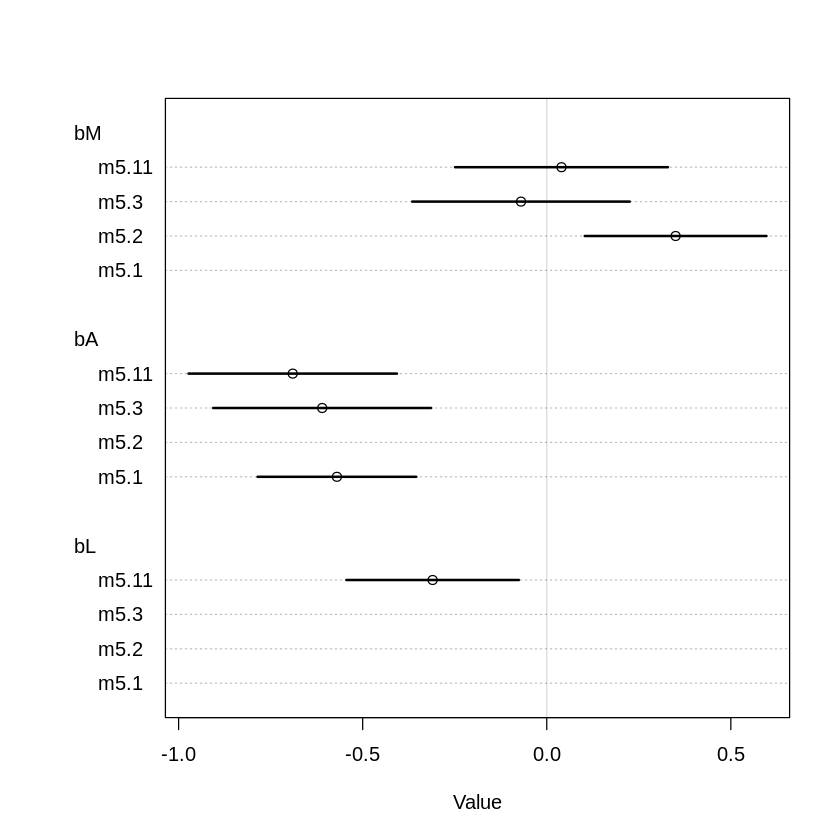

In [78]:
plot( coeftab( m5.1, m5.2, m5.3, m5.11 ) , pars=c("bM","bA","bL") )

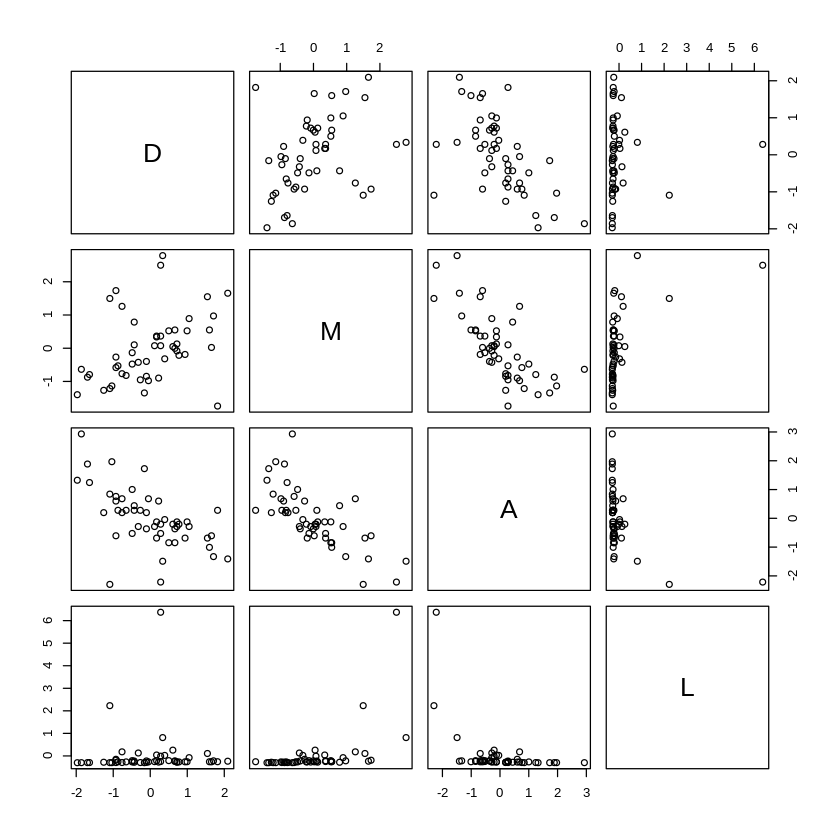

In [79]:
pairs( ~D + M + A + L , d )

Practice 5H1

In [80]:
# load data and copy
library(rethinking)
data(foxes)
d <- foxes
head(d)

group,avgfood,groupsize,area,weight
<int>,<dbl>,<int>,<dbl>,<dbl>
1,0.37,2,1.09,5.02
1,0.37,2,1.09,2.84
2,0.53,2,2.05,5.33
2,0.53,2,2.05,6.07
3,0.49,2,2.12,5.85
3,0.49,2,2.12,3.25


In [81]:
# standardize variables
d$A <- scale( d$area )
d$W <- scale( d$weight )
d$F <- scale( d$avgfood )
d$G <- scale( d$groupsize )

head(d)

group,avgfood,groupsize,area,weight,A,W,F,G
<int>,<dbl>,<int>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,0.37,2,1.09,5.02,-2.239596,0.4141347,-1.924829,-1.524089
1,0.37,2,1.09,2.84,-2.239596,-1.4270464,-1.924829,-1.524089
2,0.53,2,2.05,5.33,-1.205508,0.6759540,-1.118035,-1.524089
2,0.53,2,2.05,6.07,-1.205508,1.3009421,-1.118035,-1.524089
3,0.49,2,2.12,5.85,-1.130106,1.1151348,-1.319734,-1.524089
3,0.49,2,2.12,3.25,-1.130106,-1.0807692,-1.319734,-1.524089


In [82]:
m5.12 <- quap(
            alist(
            W ~ dnorm( mu , sigma ) ,
            mu <- a + bA*A ,
            a ~ dnorm( 0 , 1 ) ,
            bA ~ dnorm( 0 , 1 ) ,
            sigma ~ dexp( 1 )
            ) , data = d )
            
precis( m5.12 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-1.760947e-07,0.09164928,-0.1464734,0.1464731
bA,1.931231e-02,0.09204353,-0.1277910,0.1664156
sigma,9.912648e-01,0.06466627,0.8879156,1.0946140


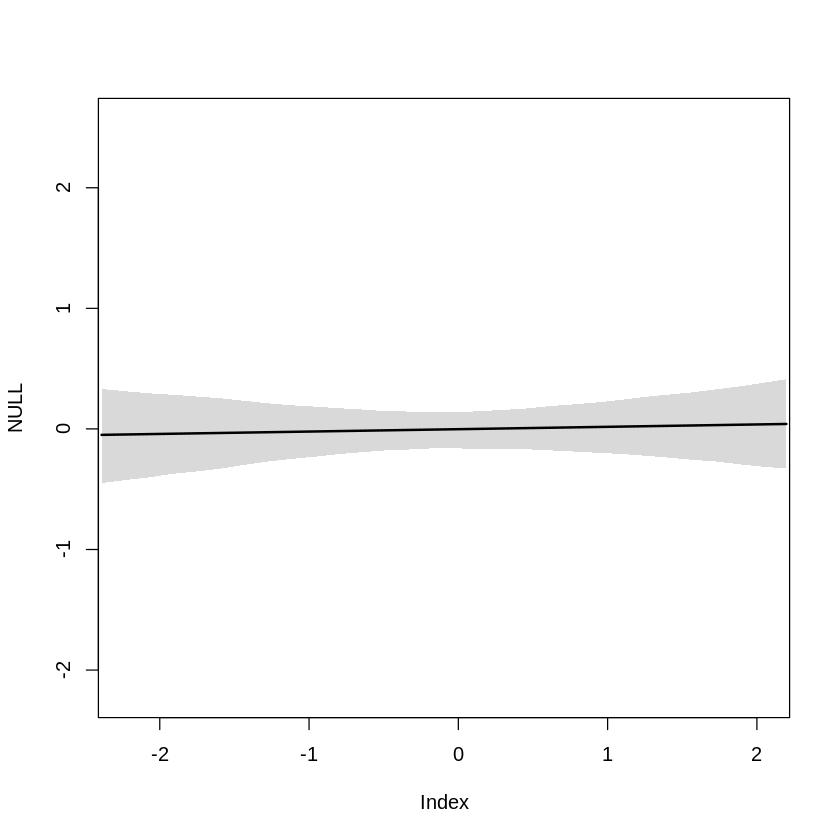

In [83]:
xseq <- seq( from=min(d$A)-0.15 , to=max(d$A)+0.15 , length.out=30 )
mu <- link( m5.12 , data=data.frame( A=xseq ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(d$A) , ylim=range(d$W) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

In [84]:
m5.13 <- quap(
            alist(
            W ~ dnorm( mu , sigma ) ,
            mu <- a + bG*G ,
            a ~ dnorm( 0 , 1 ) ,
            bG ~ dnorm( 0 , 1 ) ,
            sigma ~ dexp( 1 )
            ) , data = d )
            
precis( m5.13 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.0000014343,0.09048555,-0.1446148,0.14461196
bG,-0.1596645942,0.09087505,-0.3049005,-0.01442872
sigma,0.9785735858,0.06384361,0.8765392,1.08060800


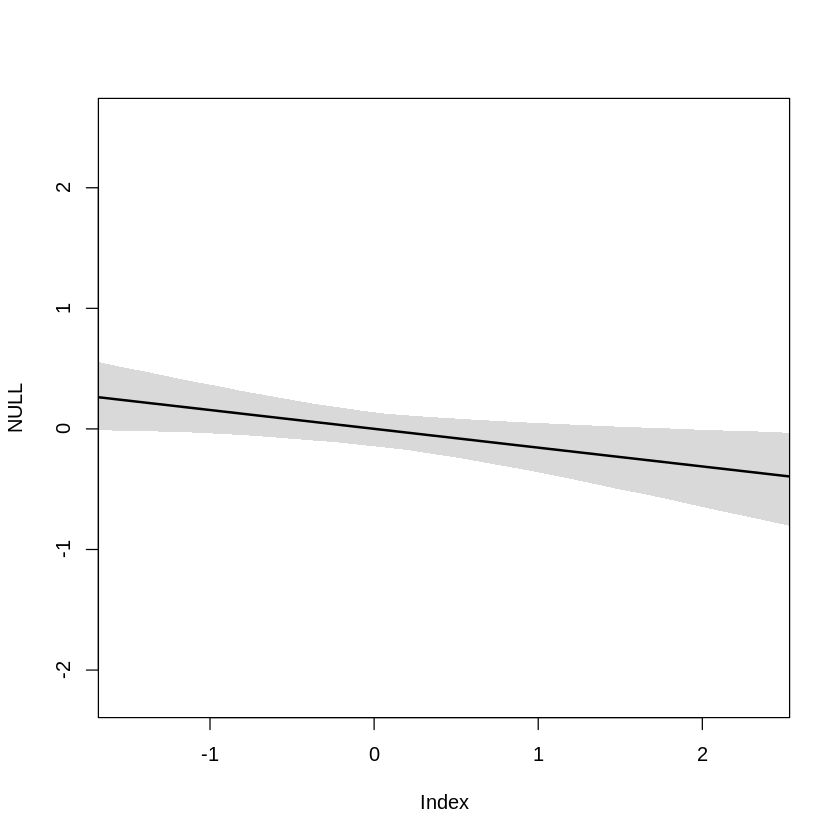

In [85]:
xseq <- seq( from=min(d$G)-0.15 , to=max(d$G)+0.15 , length.out=30 )
mu <- link( m5.13 , data=data.frame( G=xseq ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(d$G) , ylim=range(d$W) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

Practice 5H2

In [86]:
m5.14 <- quap(
            alist(
            W ~ dnorm( mu , sigma ) ,
            mu <- a + bA*A + bG*G ,
            a ~ dnorm( 0 , 1 ) ,
            bA ~ dnorm( 0 , 1 ) ,
            bG ~ dnorm( 0 , 1 ) ,
            sigma ~ dexp( 1 )
            ) , data = d )
            
precis( m5.14 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.000083497,0.08703053,-0.1390081,0.1391751
bA,0.462401092,0.15322344,0.2175204,0.7072817
bG,-0.539510329,0.15322421,-0.7843922,-0.2946284
sigma,0.940917628,0.06141439,0.8427656,1.0390697


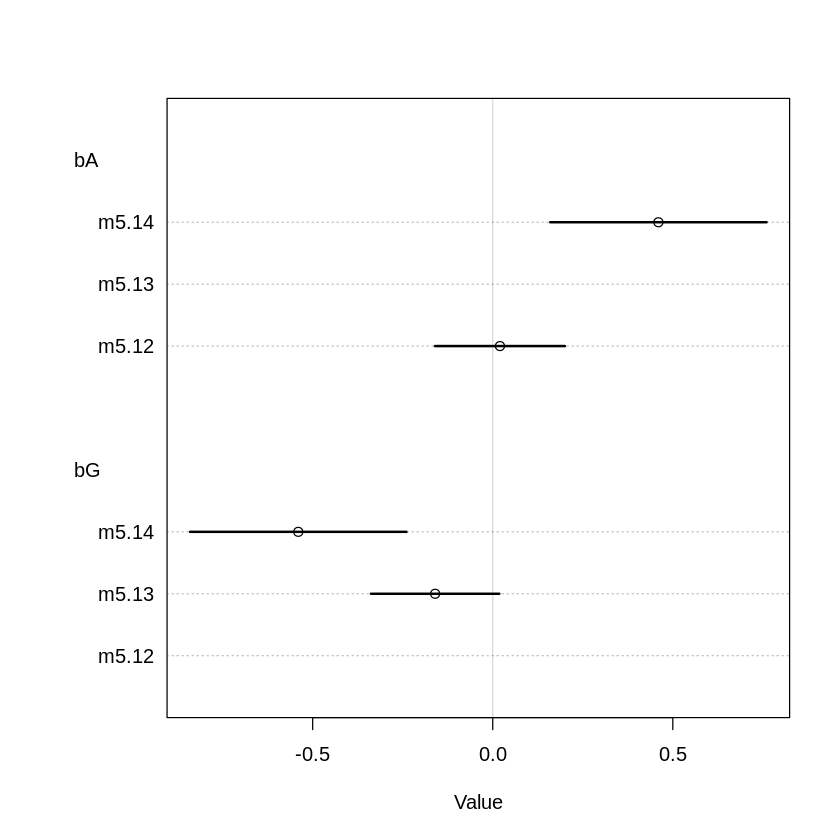

In [87]:
plot( coeftab( m5.12, m5.13, m5.14 ) , pars=c("bA","bG") )

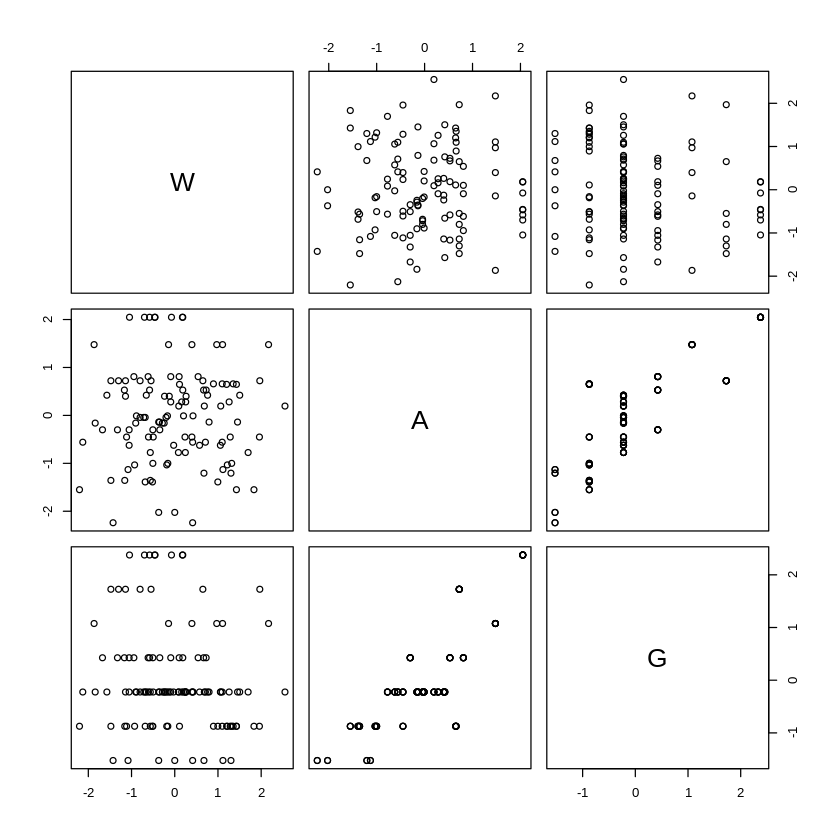

In [88]:
pairs( ~W + A + G , d )

Area and Group size are correlated, but they mask the effect of each other in bivariate regressions against fox weight.  This is probably because as the area available to a fox group increases, the amount of food to the group increases, however the group size probably increases, thus the amount of food available to each fox remains similar.  Therefore, it is only when we control for group size, that we can see the positive correlation between weight and area.  Likewise, we can only see the negative correlation between weight and group size when we control for area, because larger fox groups are generally found in larger areas.

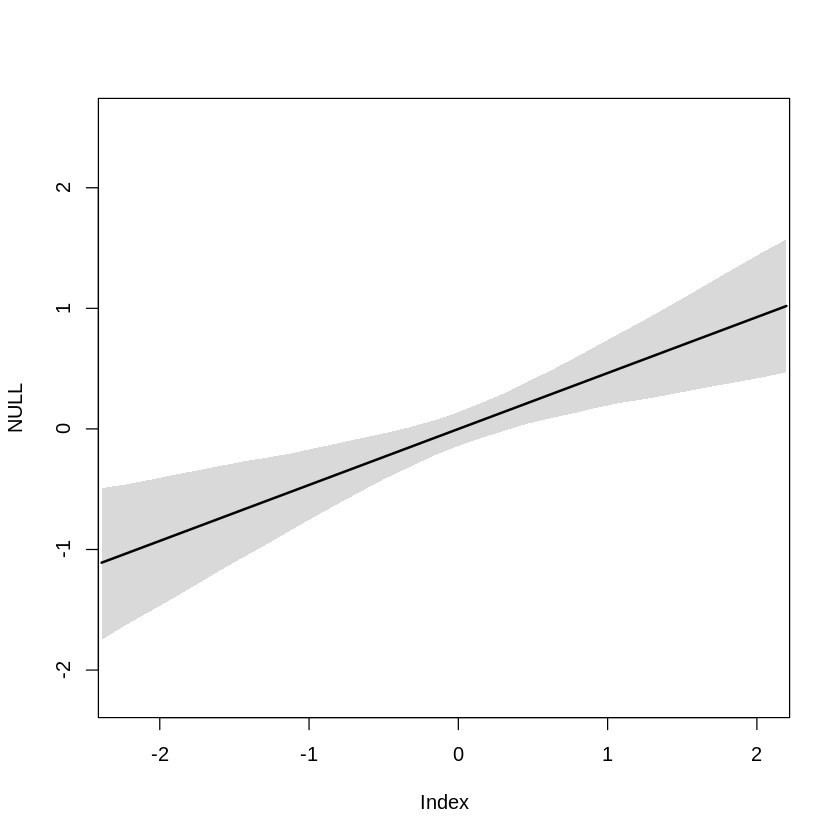

In [89]:
xseq <- seq( from=min(d$A)-0.15 , to=max(d$A)+0.15 , length.out=30 )
mu <- link( m5.14 , data=data.frame( G=0, A=xseq ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(d$A) , ylim=range(d$W) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

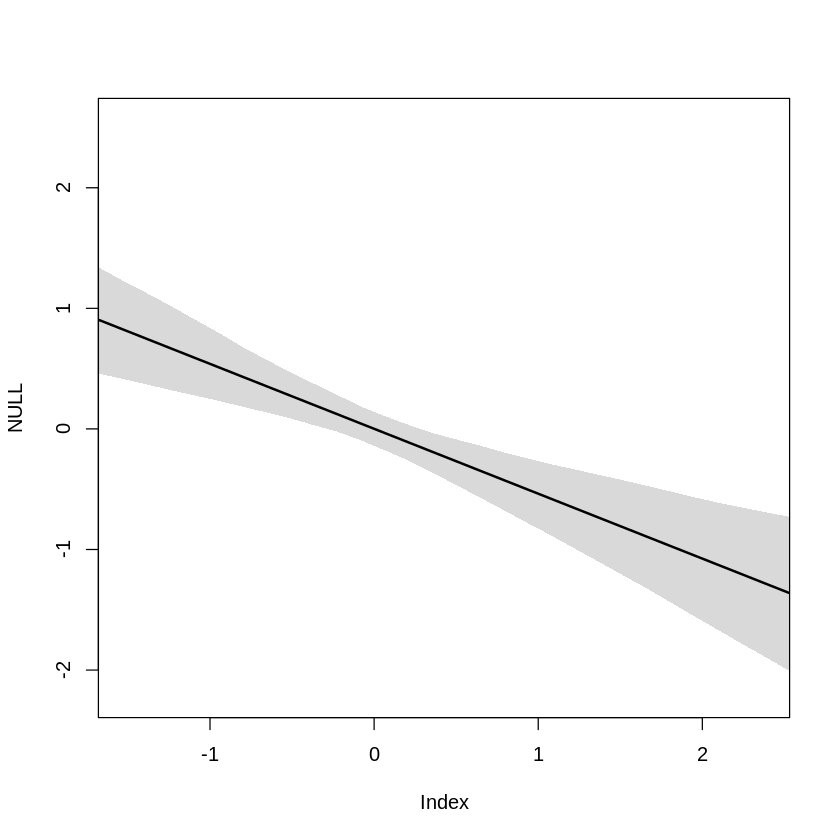

In [90]:
xseq <- seq( from=min(d$G)-0.15 , to=max(d$G)+0.15 , length.out=30 )
mu <- link( m5.14 , data=data.frame( A=0, G=xseq ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(d$G) , ylim=range(d$W) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

Practice 5H3

Body weight as an additive function of avgfood and groupsize.

In [91]:
m5.15 <- quap(
            alist(
            W ~ dnorm( mu , sigma ) ,
            mu <- a + bF*F + bG*G ,
            a ~ dnorm( 0 , 1 ) ,
            bF ~ dnorm( 0 , 1 ) ,
            bG ~ dnorm( 0 , 1 ) ,
            sigma ~ dexp( 1 )
            ) , data = d )
            
precis( m5.15 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,3.073079e-07,0.08690201,-0.1388859,0.1388865
bF,5.914102e-01,0.19541324,0.2791021,0.9037183
bG,-6.888536e-01,0.19541482,-1.0011643,-0.3765430
sigma,9.395176e-01,0.06134170,0.8414817,1.0375535


Body weight as an additive function of all three variables (avgfood and groupsize and area):

In [92]:
m5.16 <- quap(
            alist(
            W ~ dnorm( mu , sigma ) ,
            mu <- a + bA*A + bF*F + bG*G,
            a ~ dnorm( 0 , 1 ) ,
            bA ~ dnorm( 0 , 1 ) ,
            bG ~ dnorm( 0 , 1 ) ,
            bF ~ dnorm( 0 , 1 ) ,
            sigma ~ dexp( 1 )
            ) , data = d )
            
precis( m5.16 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-2.200404e-05,0.08595113,-0.137388504,0.1373445
bA,2.969070e-01,0.18206875,0.005925963,0.5878880
bG,-7.451240e-01,0.19634127,-1.058915294,-0.4313328
bF,3.812928e-01,0.23258166,0.009582381,0.7530032
sigma,9.291604e-01,0.06065976,0.832214441,1.0261065


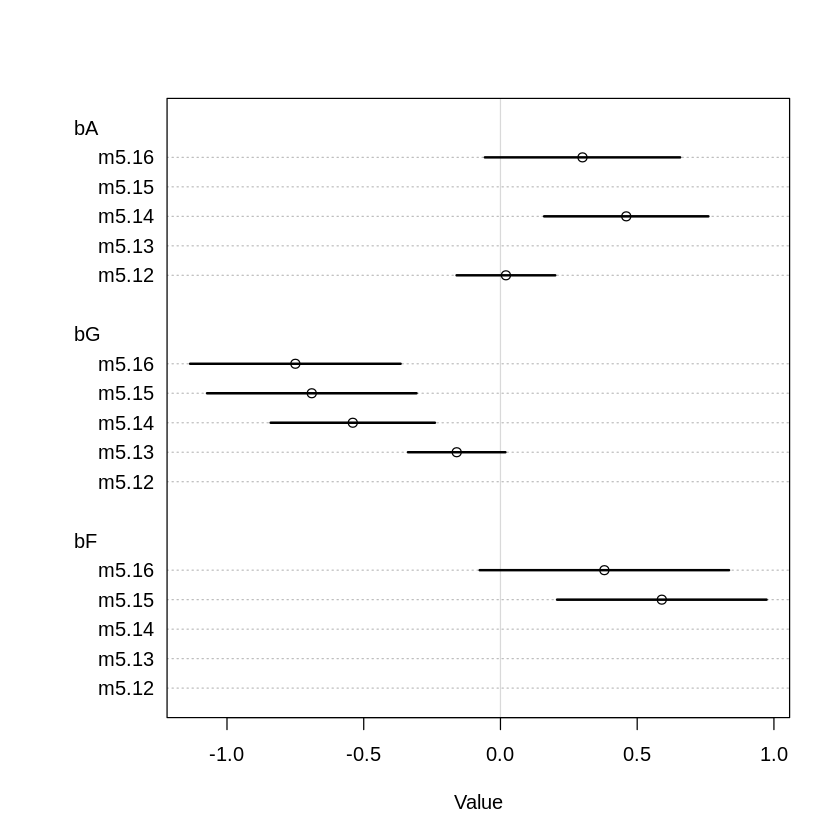

In [93]:
plot( coeftab( m5.12, m5.13, m5.14, m5.15, m5.16 ) , pars=c("bA","bG","bF") )

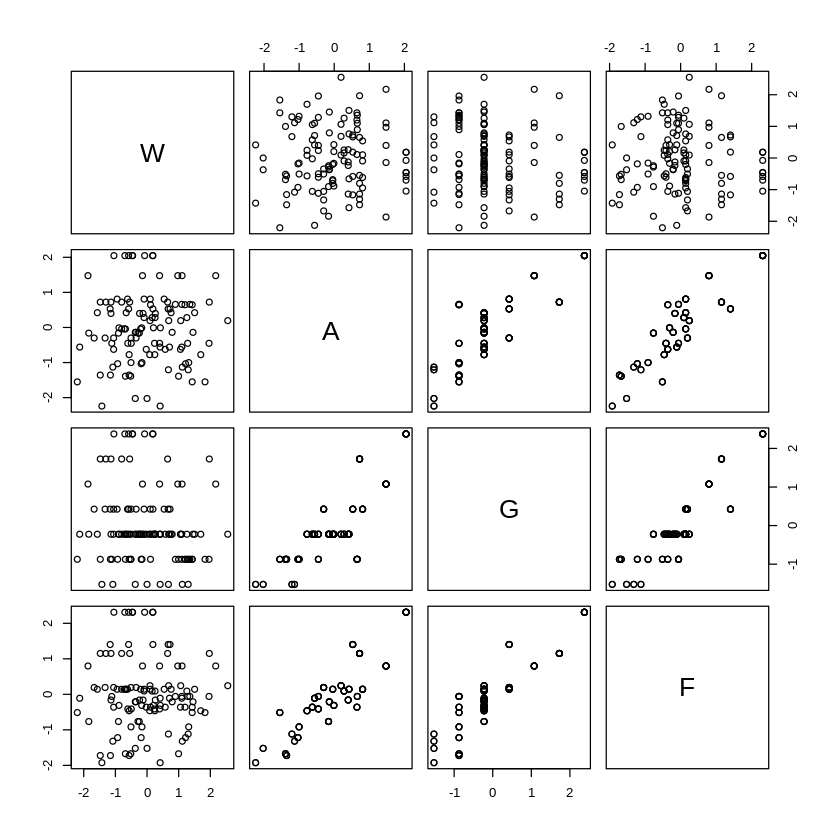

In [94]:
pairs( ~W + A + G + F , d )

If you could only have one of F (food) or A (area), it would probably be better to use F as the predictor as in this case, the coefficient of G is closer to its value observed when including both F and A.  Also, the coefficient of F is slightly more positive (further from 0) than A in both the sole and combined variable regressions.  Finally, a relationship between fox weight and food supply has a clearer intuitive theoretical relationship.

When both avgfood and area are included in the same model, their respective effects on fox weight are weaker.  This is because the relationsips of weight with avgfood and area have the same sign (positive) of correlation.  Therefore given a constant variation of fox weight, the impact of these two degrees of freedom must be shared.  Imagine what would happen if, when combining both effects, their coefficients were greater, given constant group size.  What would this mean?